In [954]:
from statsmodels.graphics.gofplots import qqplot


- Clean up any outliers or missing values if needed
- Smooth your time series and compare with the original
This will give you an idea of how well your smoothing technique is doing at removing noise from your data.
The ACF should be close to zero for lags greater than the smoothing window, as this indicates that the signal has been effectively removed by
If the ACF plot shows significant lags, it may be worth trying a different smoothing method.


Now you will be using the smoothed version of cnt: choose the smoothing method and justify your choice.
Add the right frequency to your smoothed time series et justify your choices
What could you tell about this new time series in term of stationarity and seasonality? Justify your conclusions.

NB : 
I have already checked statistical and datatype info, missing values and unique values to identify categorical variables

In [955]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 


In [956]:
data = pd.read_csv('bike+sharing+dataset/hour.csv')


In [957]:
data['dteday'] = pd.to_datetime(data['dteday'])
data['season'] = data.season.astype('category')
data['mnth'] = data.mnth.astype('category')
data['hr'] = data.hr.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weathersit'] = data.weathersit.astype('category')


In [958]:
# reverifier val manquantes, info stat et type info

In [959]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [960]:
data.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [961]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [962]:
data.describe()

instant                         dteday            yr          temp  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      0.502561      0.496987   
min        1.0000            2011-01-01 00:00:00      0.000000      0.020000   
25%     4345.5000            2011-07-04 00:00:00      0.000000      0.340000   
50%     8690.0000            2012-01-02 00:00:00      1.000000      0.500000   
75%    13034.5000            2012-07-02 00:00:00      1.000000      0.660000   
max    17379.0000            2012-12-31 00:00:00      1.000000      1.000000   
std     5017.0295                            NaN      0.500008      0.192556   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   
std        0.171850      0.192930      0.122340     49.305030    151.357286   

                cnt  
count  17379.000000  
mean     189.463088  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000  
std      181.387599

In [963]:
#renomer les colonnes
data.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "hr":"hour",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

In [964]:
data.head()

instant       date season  year month hour holiday weekday workingday  \
0        1 2011-01-01      1     0     1    0       0       6          0   
1        2 2011-01-01      1     0     1    1       0       6          0   
2        3 2011-01-01      1     0     1    2       0       6          0   
3        4 2011-01-01      1     0     1    3       0       6          0   
4        5 2011-01-01      1     0     1    4       0       6          0   

  weather  temp   atemp  humidity  windspeed  casual  registered  total_count  
0       1  0.24  0.2879      0.81        0.0       3          13           16  
1       1  0.22  0.2727      0.80        0.0       8          32           40  
2       1  0.22  0.2727      0.80        0.0       5          27           32  
3       1  0.24  0.2879      0.75        0.0       3          10           13  
4       1  0.24  0.2879      0.75        0.0       0           1            1

Supression des colonnes insignifiantes

In [965]:
data = data.drop(columns=['instant'])
len(data.columns)

16

In [966]:
data.columns

Index(['date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'total_count'],
      dtype='object')

##### Smoothing hour

C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\991389005.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count'], ax=ax1)


[Text(0.5, 1.0, 'Theoritical quantiles')]

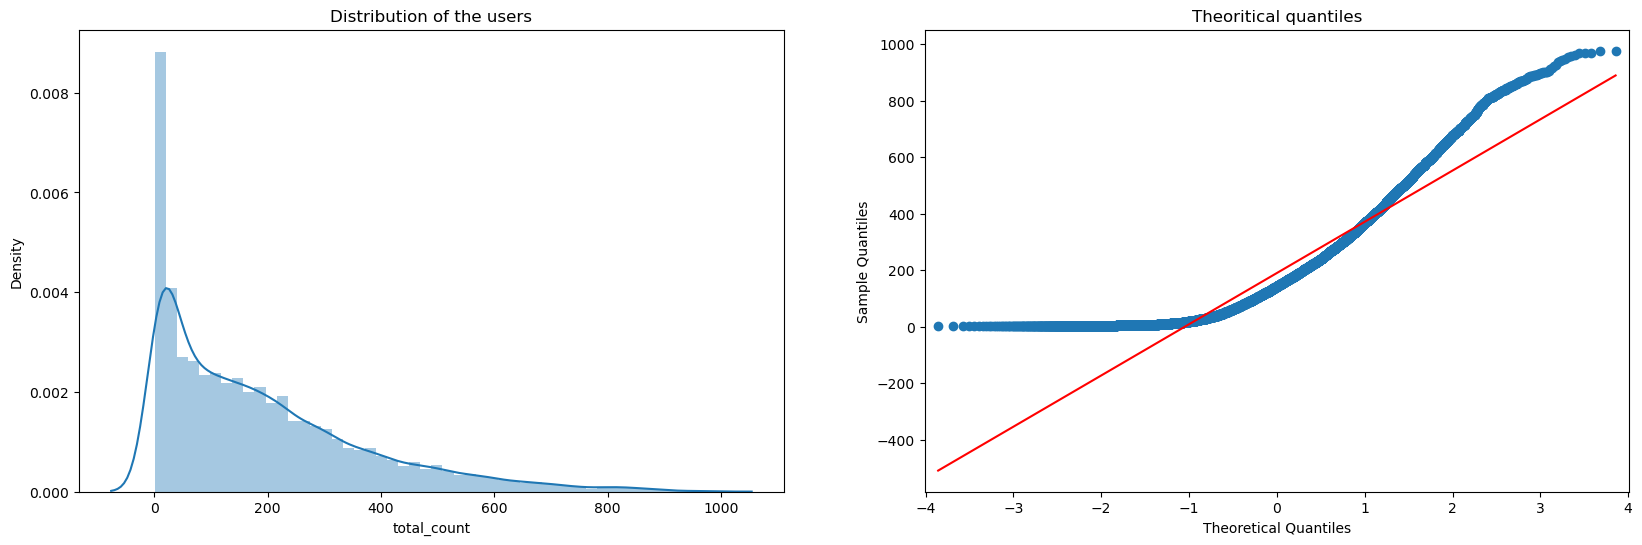

In [967]:
## original 
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(data['total_count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(data['total_count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\1613152636.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count_smoothed_log'], ax=ax2)


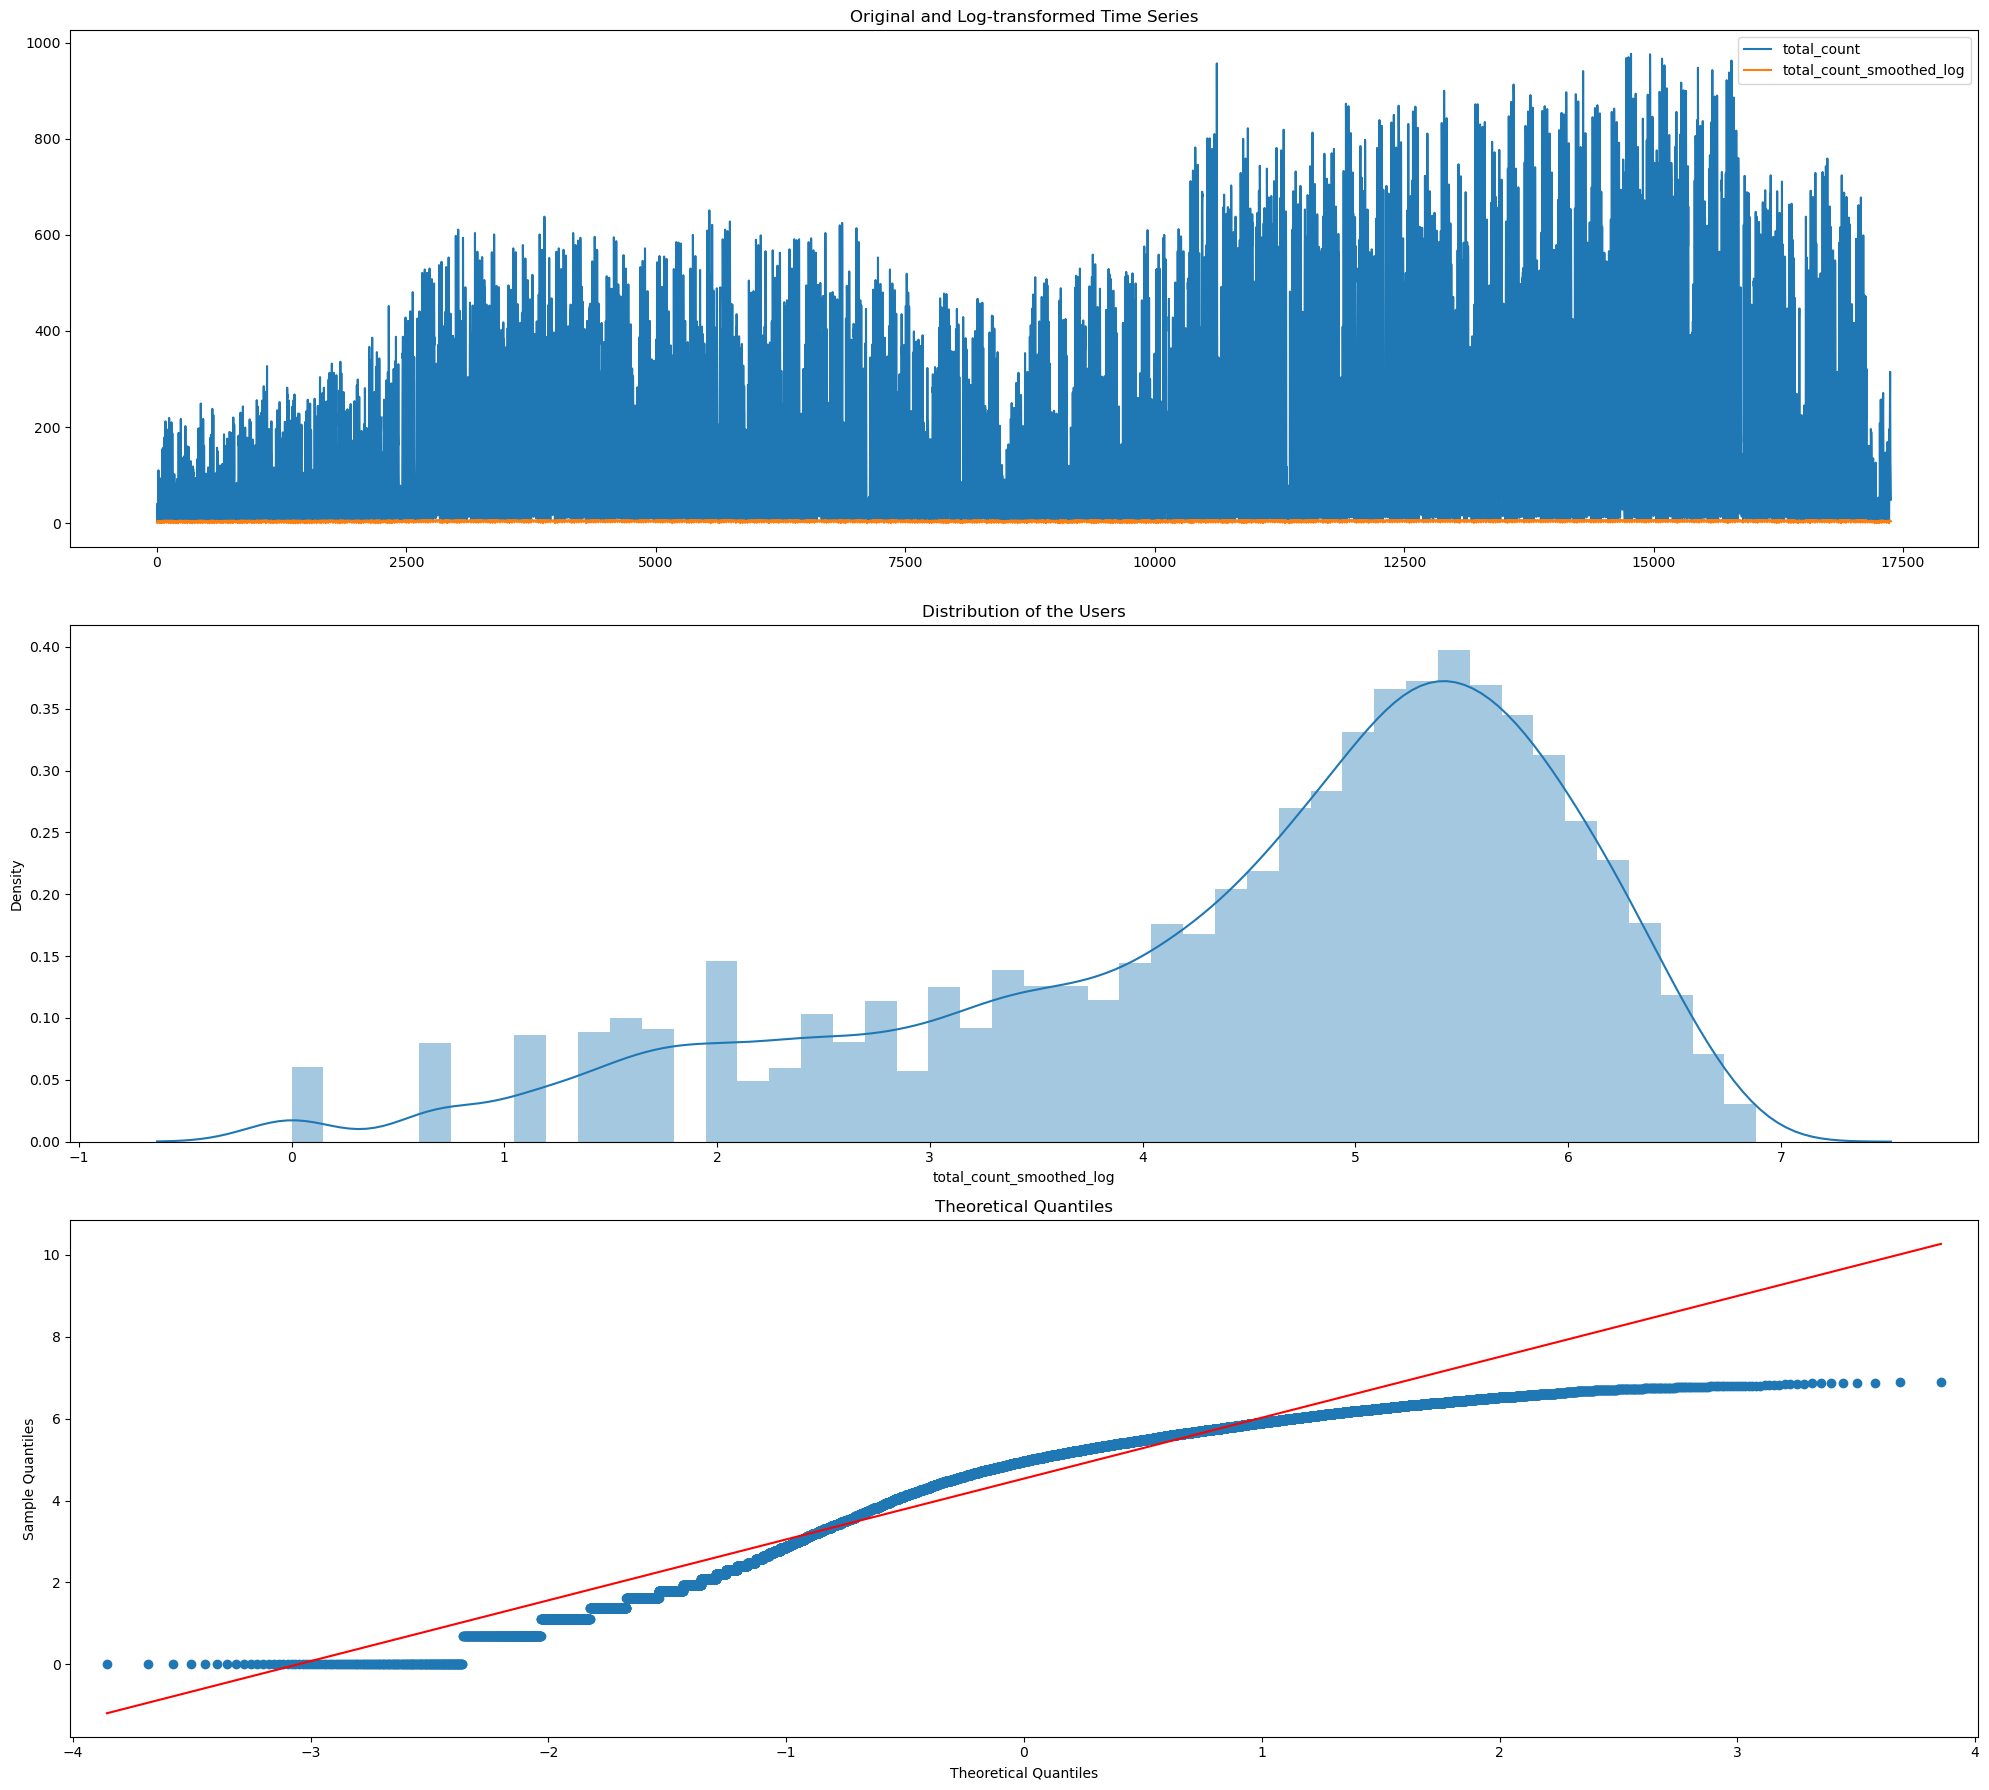

In [968]:
#log
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

data['total_count_smoothed_log'] = np.log(data['total_count'])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))

data[['total_count', 'total_count_smoothed_log']].plot(ax=ax1)
ax1.set(title='Original and Log-transformed Time Series')

sns.distplot(data['total_count_smoothed_log'], ax=ax2)
ax2.set(title='Distribution of the Users')

qqplot(data['total_count_smoothed_log'], ax=ax3, line='s')
ax3.set(title='Theoretical Quantiles')

plt.tight_layout()
plt.show()


C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\4255666161.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_count_smoothed_moving_average'][:7] = mean
C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\4255666161.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count_smoothed_moving_average'], ax=ax2)


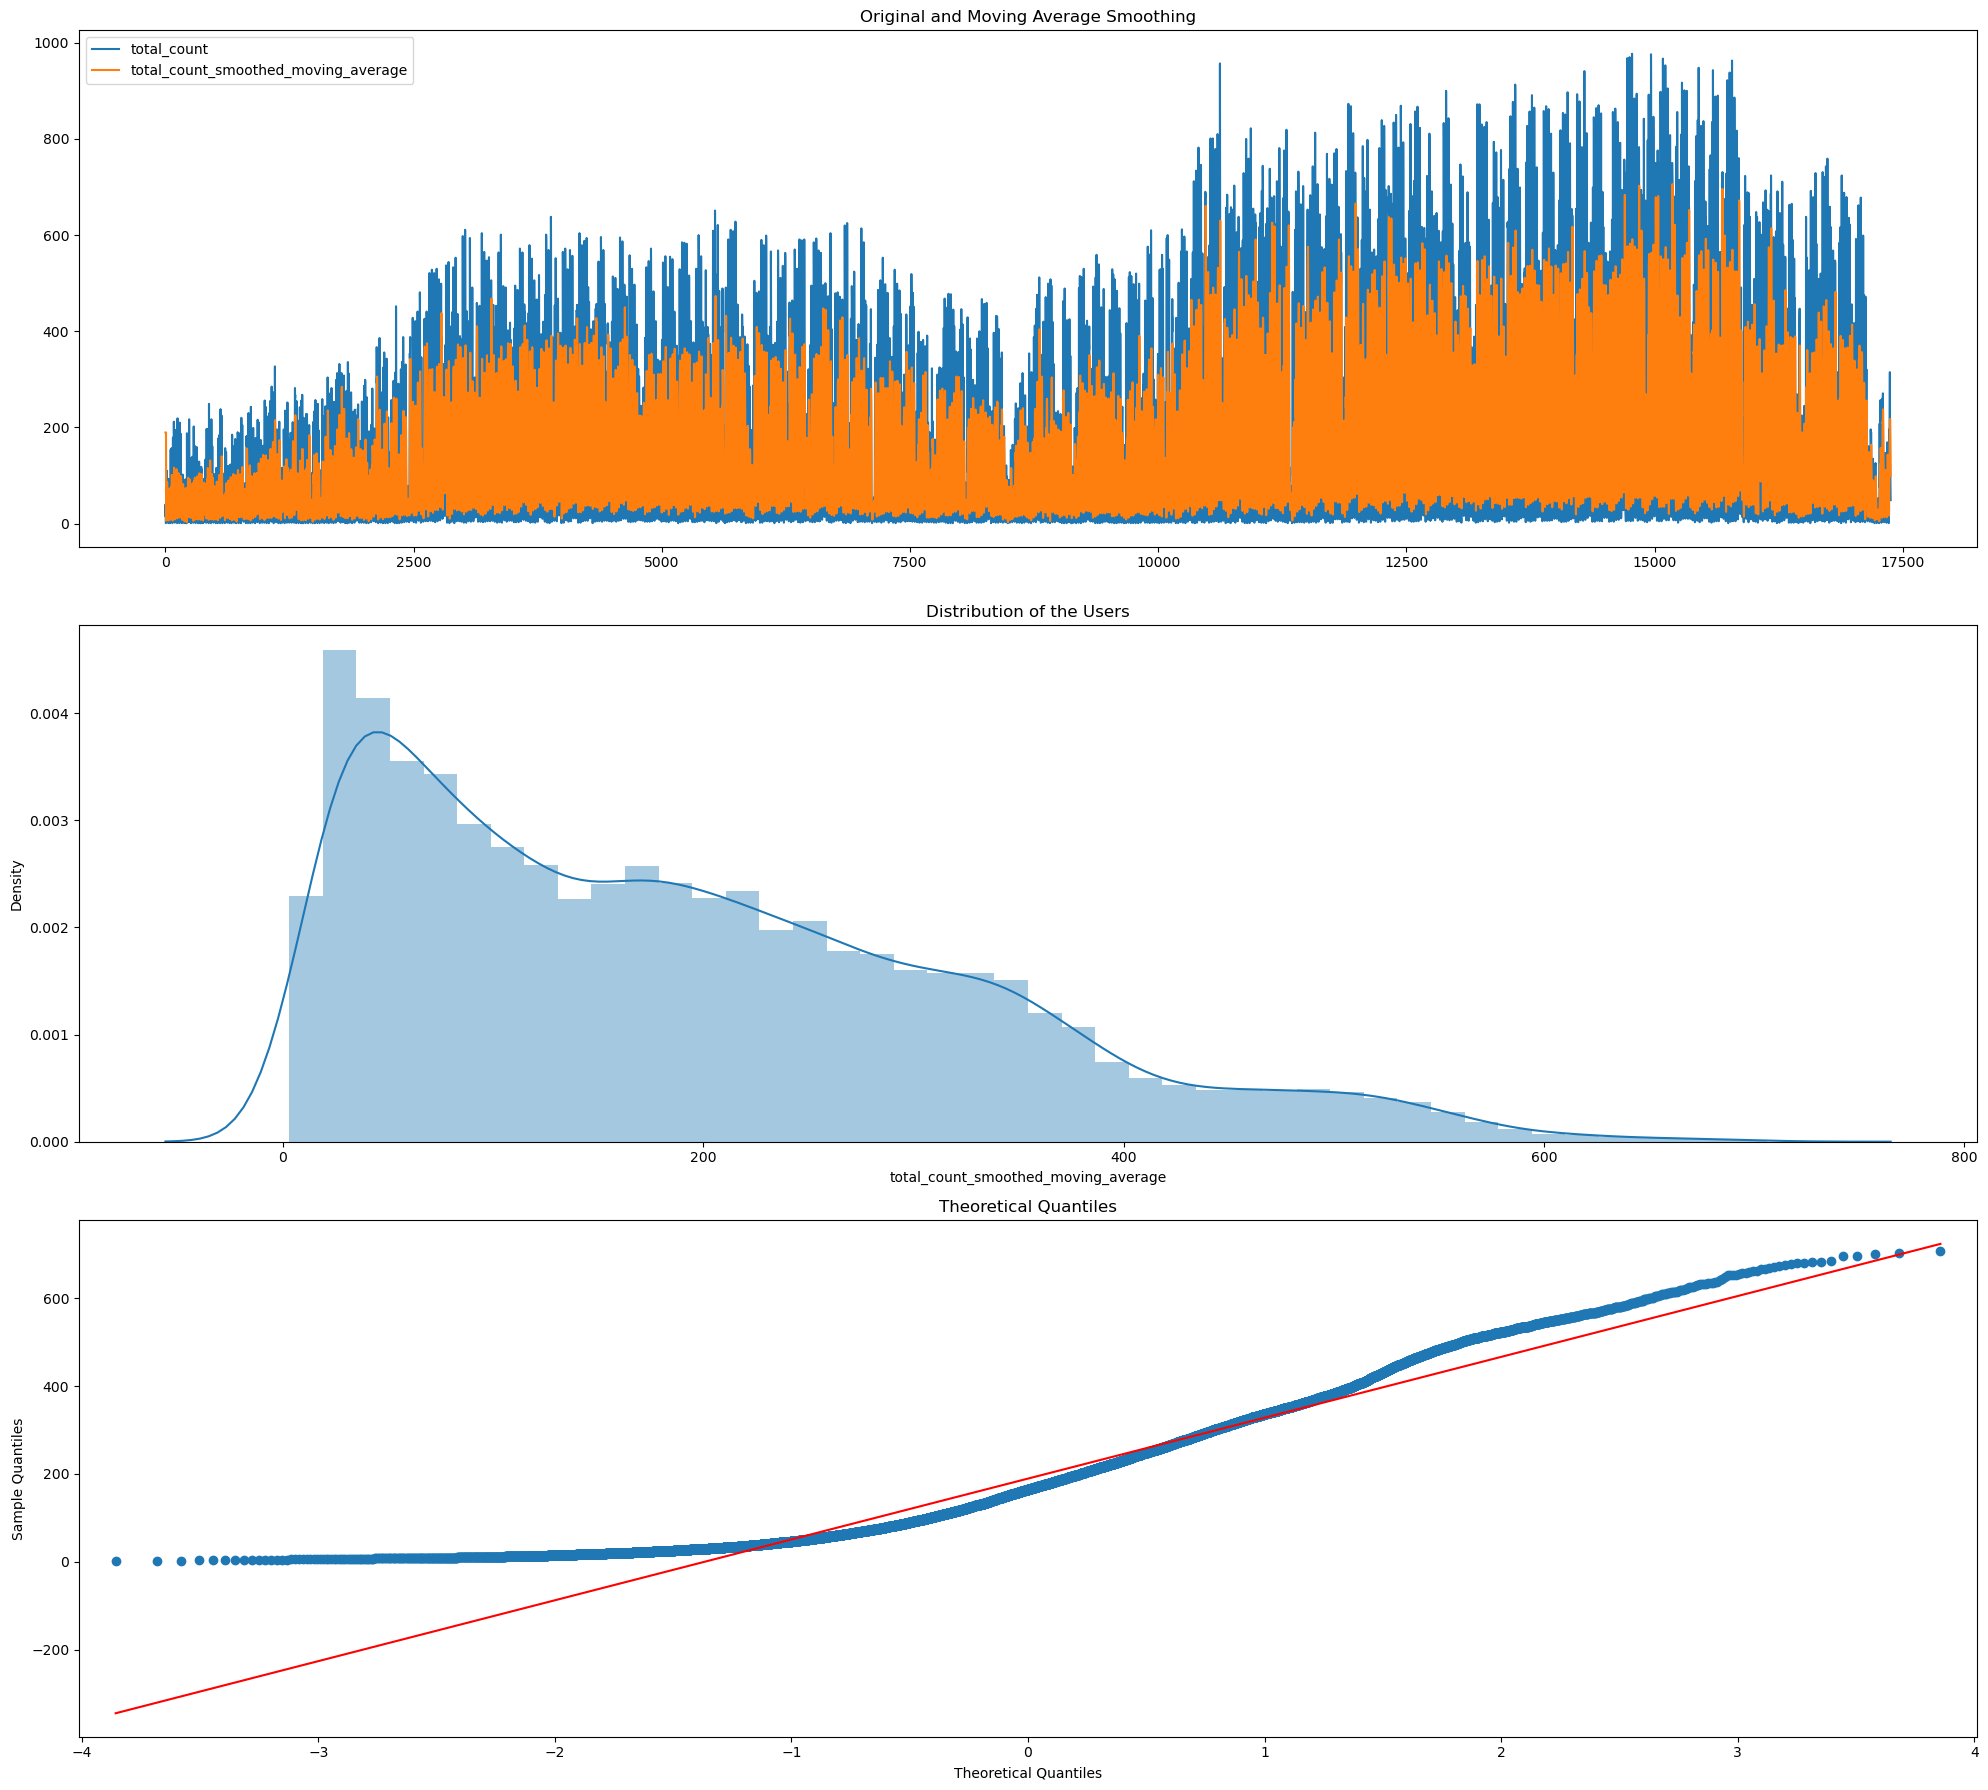

In [969]:
##moving average
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

data['total_count_smoothed_moving_average'] = data['total_count'].rolling(window=7).mean()
# the moving avg function will give NaN in the first 7 values, nous allons les remplacer par la moyenne (l'une des methodes vu en cours)
mean = data['total_count_smoothed_moving_average'][7:].mean()

data['total_count_smoothed_moving_average'][:7] = mean

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))

data[['total_count', 'total_count_smoothed_moving_average']].plot(ax=ax1)
ax1.set(title='Original and Moving Average Smoothing')

sns.distplot(data['total_count_smoothed_moving_average'], ax=ax2)
ax2.set(title='Distribution of the Users')

qqplot(data['total_count_smoothed_moving_average'], ax=ax3, line='s')
ax3.set(title='Theoretical Quantiles')

plt.tight_layout()
plt.show()


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\2124232646.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count_smoothed_holt'], ax=ax2)


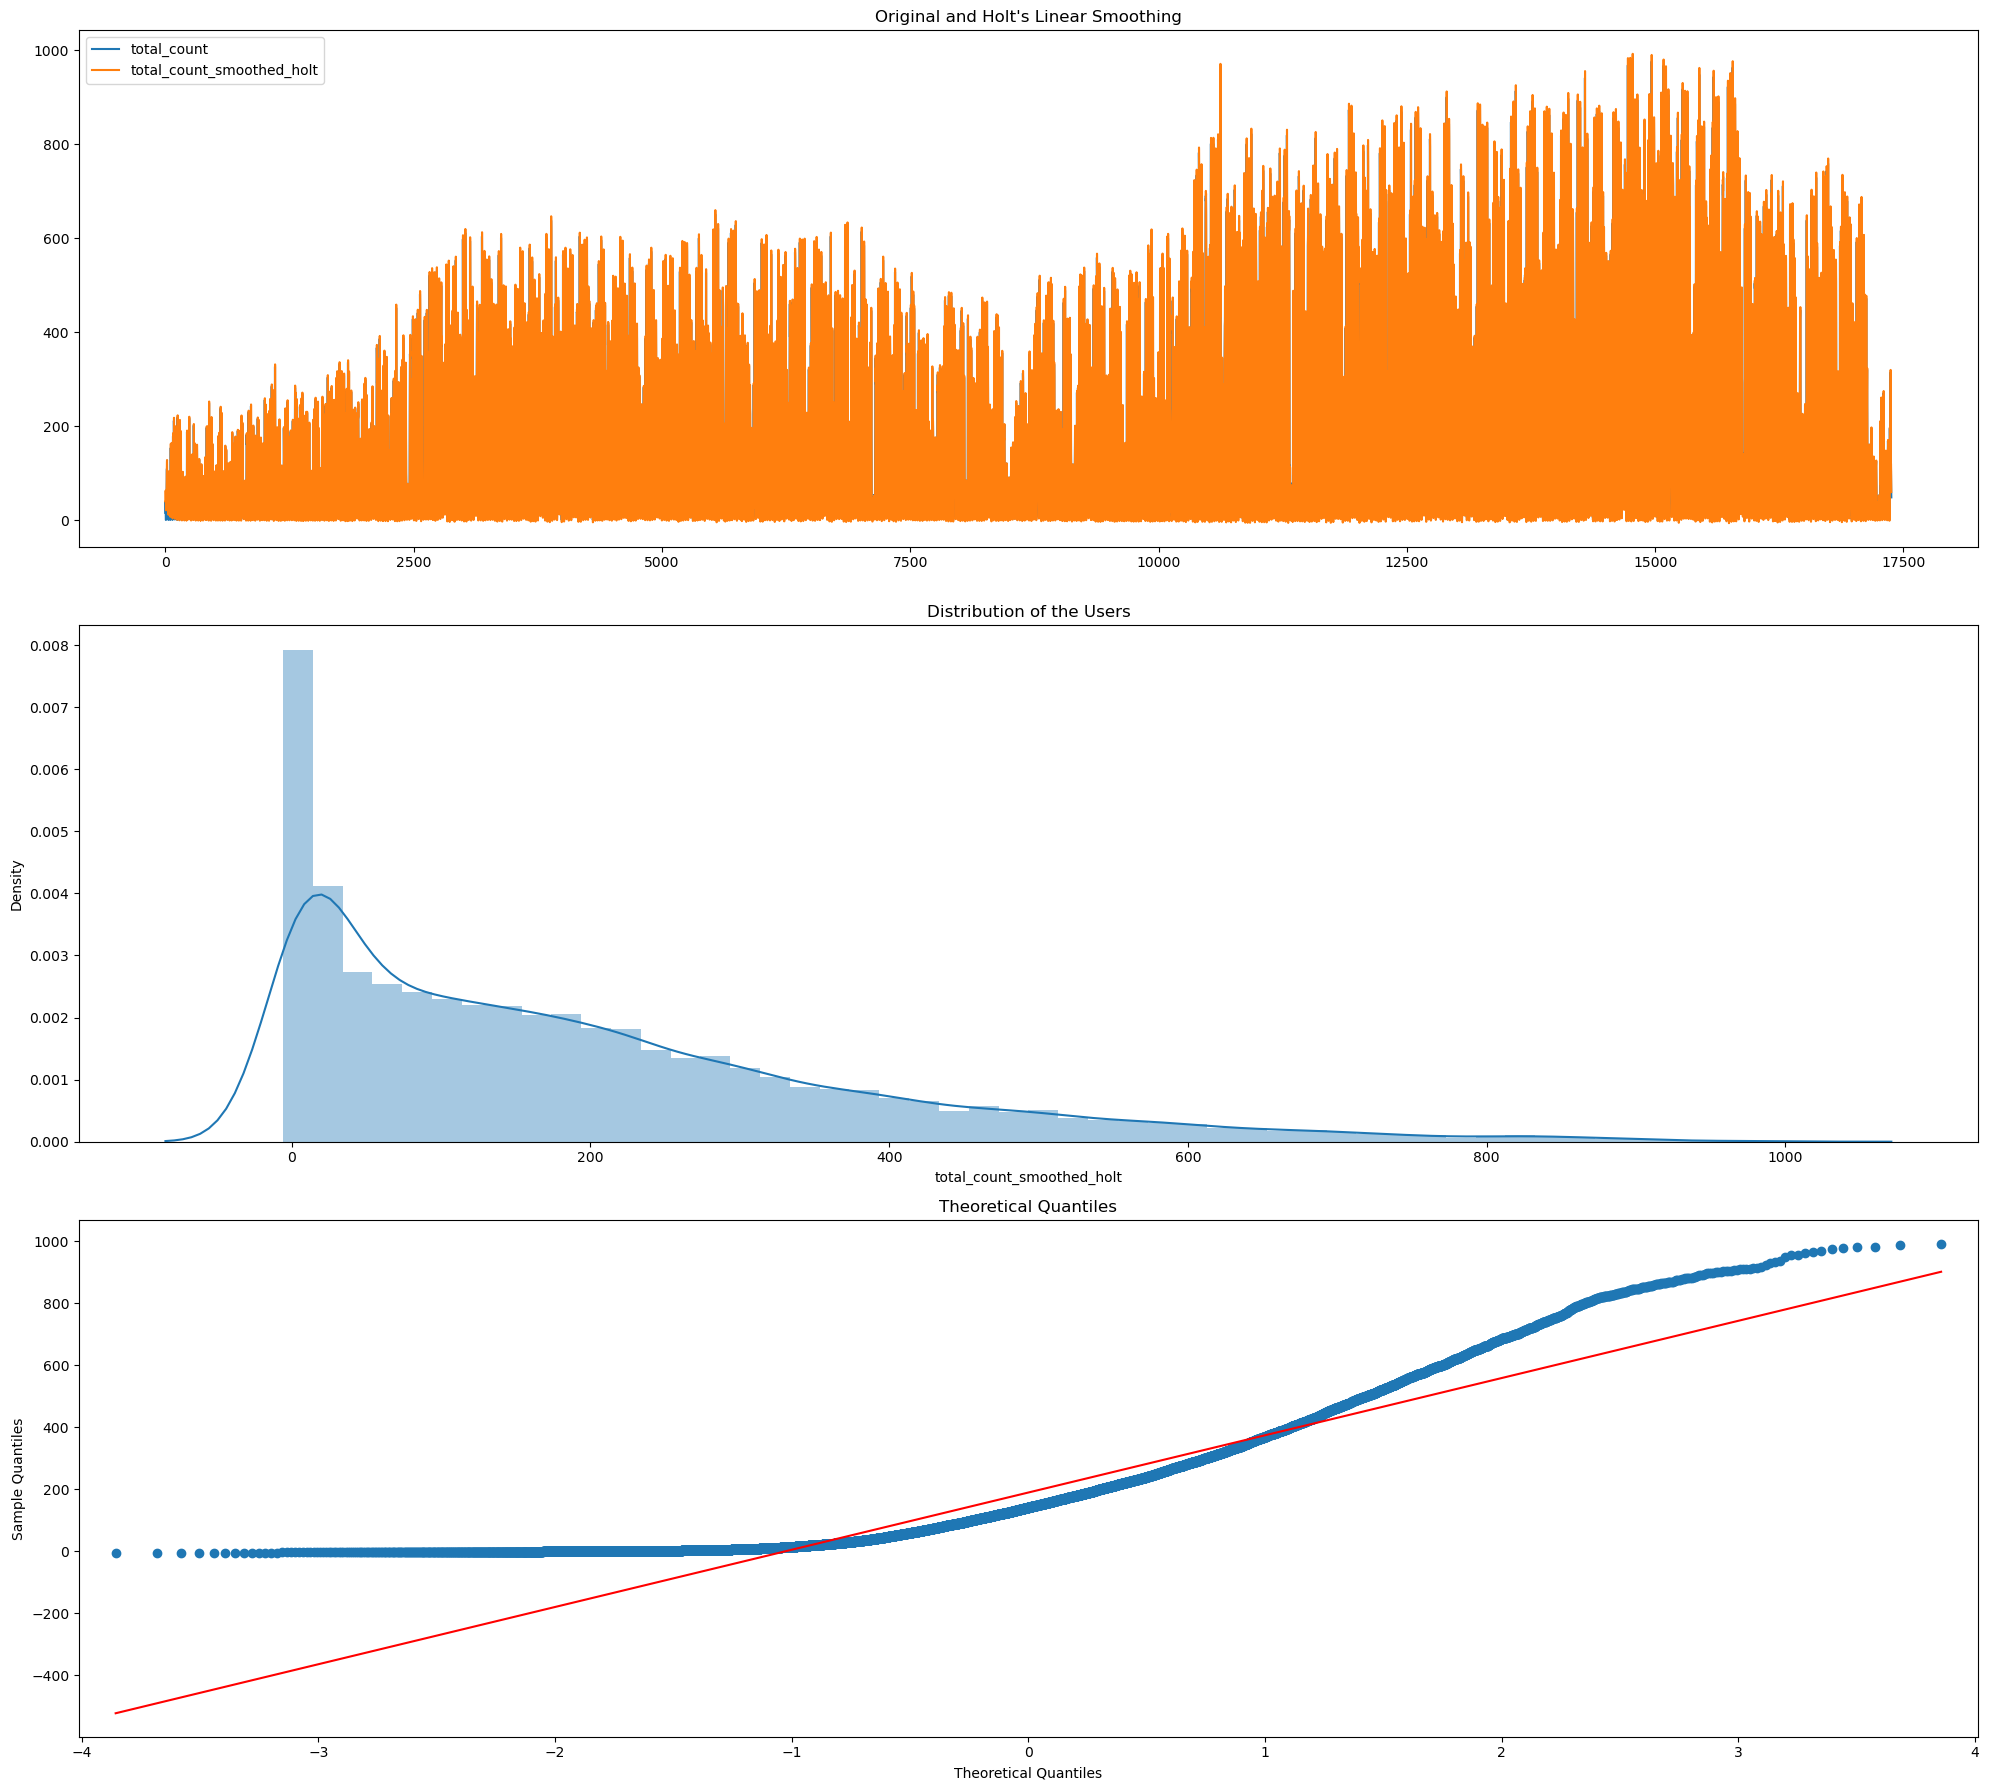

In [970]:
#linear holt winters
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import Holt
from statsmodels.graphics.gofplots import qqplot

data['total_count_smoothed_holt'] = Holt(data['total_count']).fit().fittedvalues

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))

data[['total_count', 'total_count_smoothed_holt']].plot(ax=ax1)
ax1.set(title='Original and Holt\'s Linear Smoothing')

sns.distplot(data['total_count_smoothed_holt'], ax=ax2)
ax2.set(title='Distribution of the Users')

qqplot(data['total_count_smoothed_holt'], ax=ax3, line='s')
ax3.set(title='Theoretical Quantiles')

plt.tight_layout()
plt.show()


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\362985688.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count_smoothed_holt_winters'], ax=ax2)


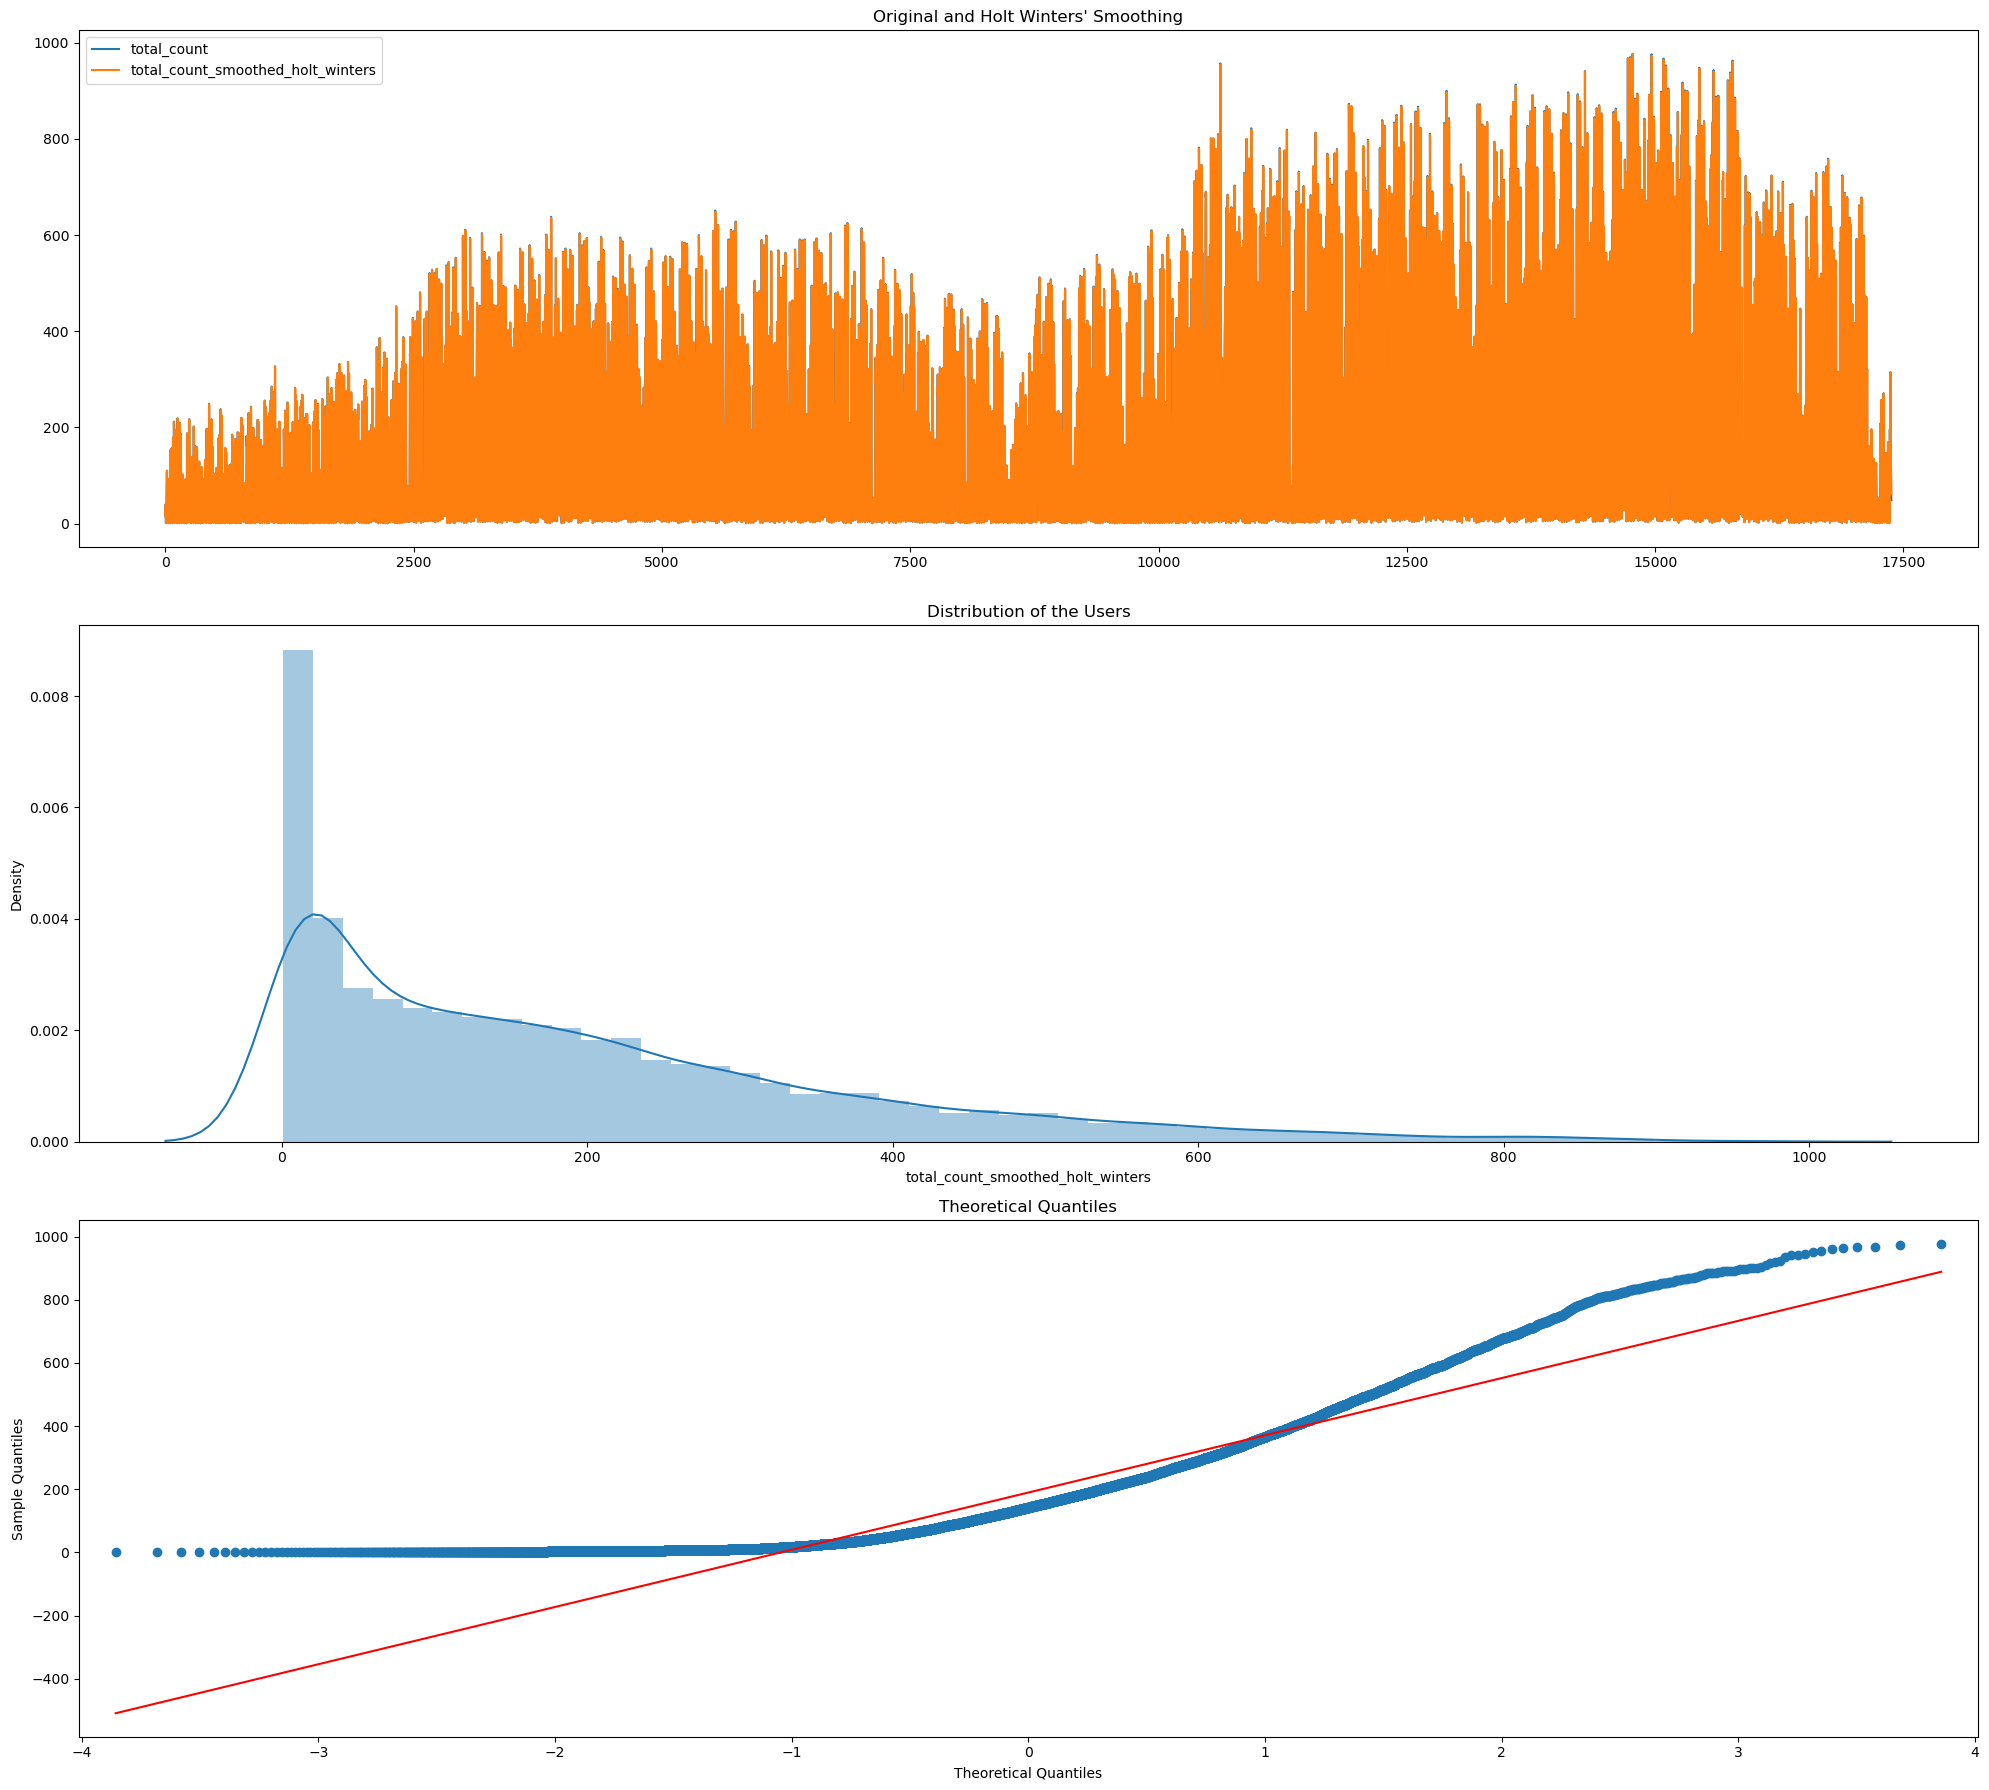

In [971]:
#holt winters smoothing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.gofplots import qqplot

data['total_count_smoothed_holt_winters'] = ExponentialSmoothing(data['total_count']).fit().fittedvalues

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))

data[['total_count', 'total_count_smoothed_holt_winters']].plot(ax=ax1)
ax1.set(title='Original and Holt Winters\' Smoothing')

sns.distplot(data['total_count_smoothed_holt_winters'], ax=ax2)
ax2.set(title='Distribution of the Users')

qqplot(data['total_count_smoothed_holt_winters'], ax=ax3, line='s')
ax3.set(title='Theoretical Quantiles')

plt.tight_layout()
plt.show()


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\1177096904.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count_smoothed_exponential_holt'], ax=ax2)


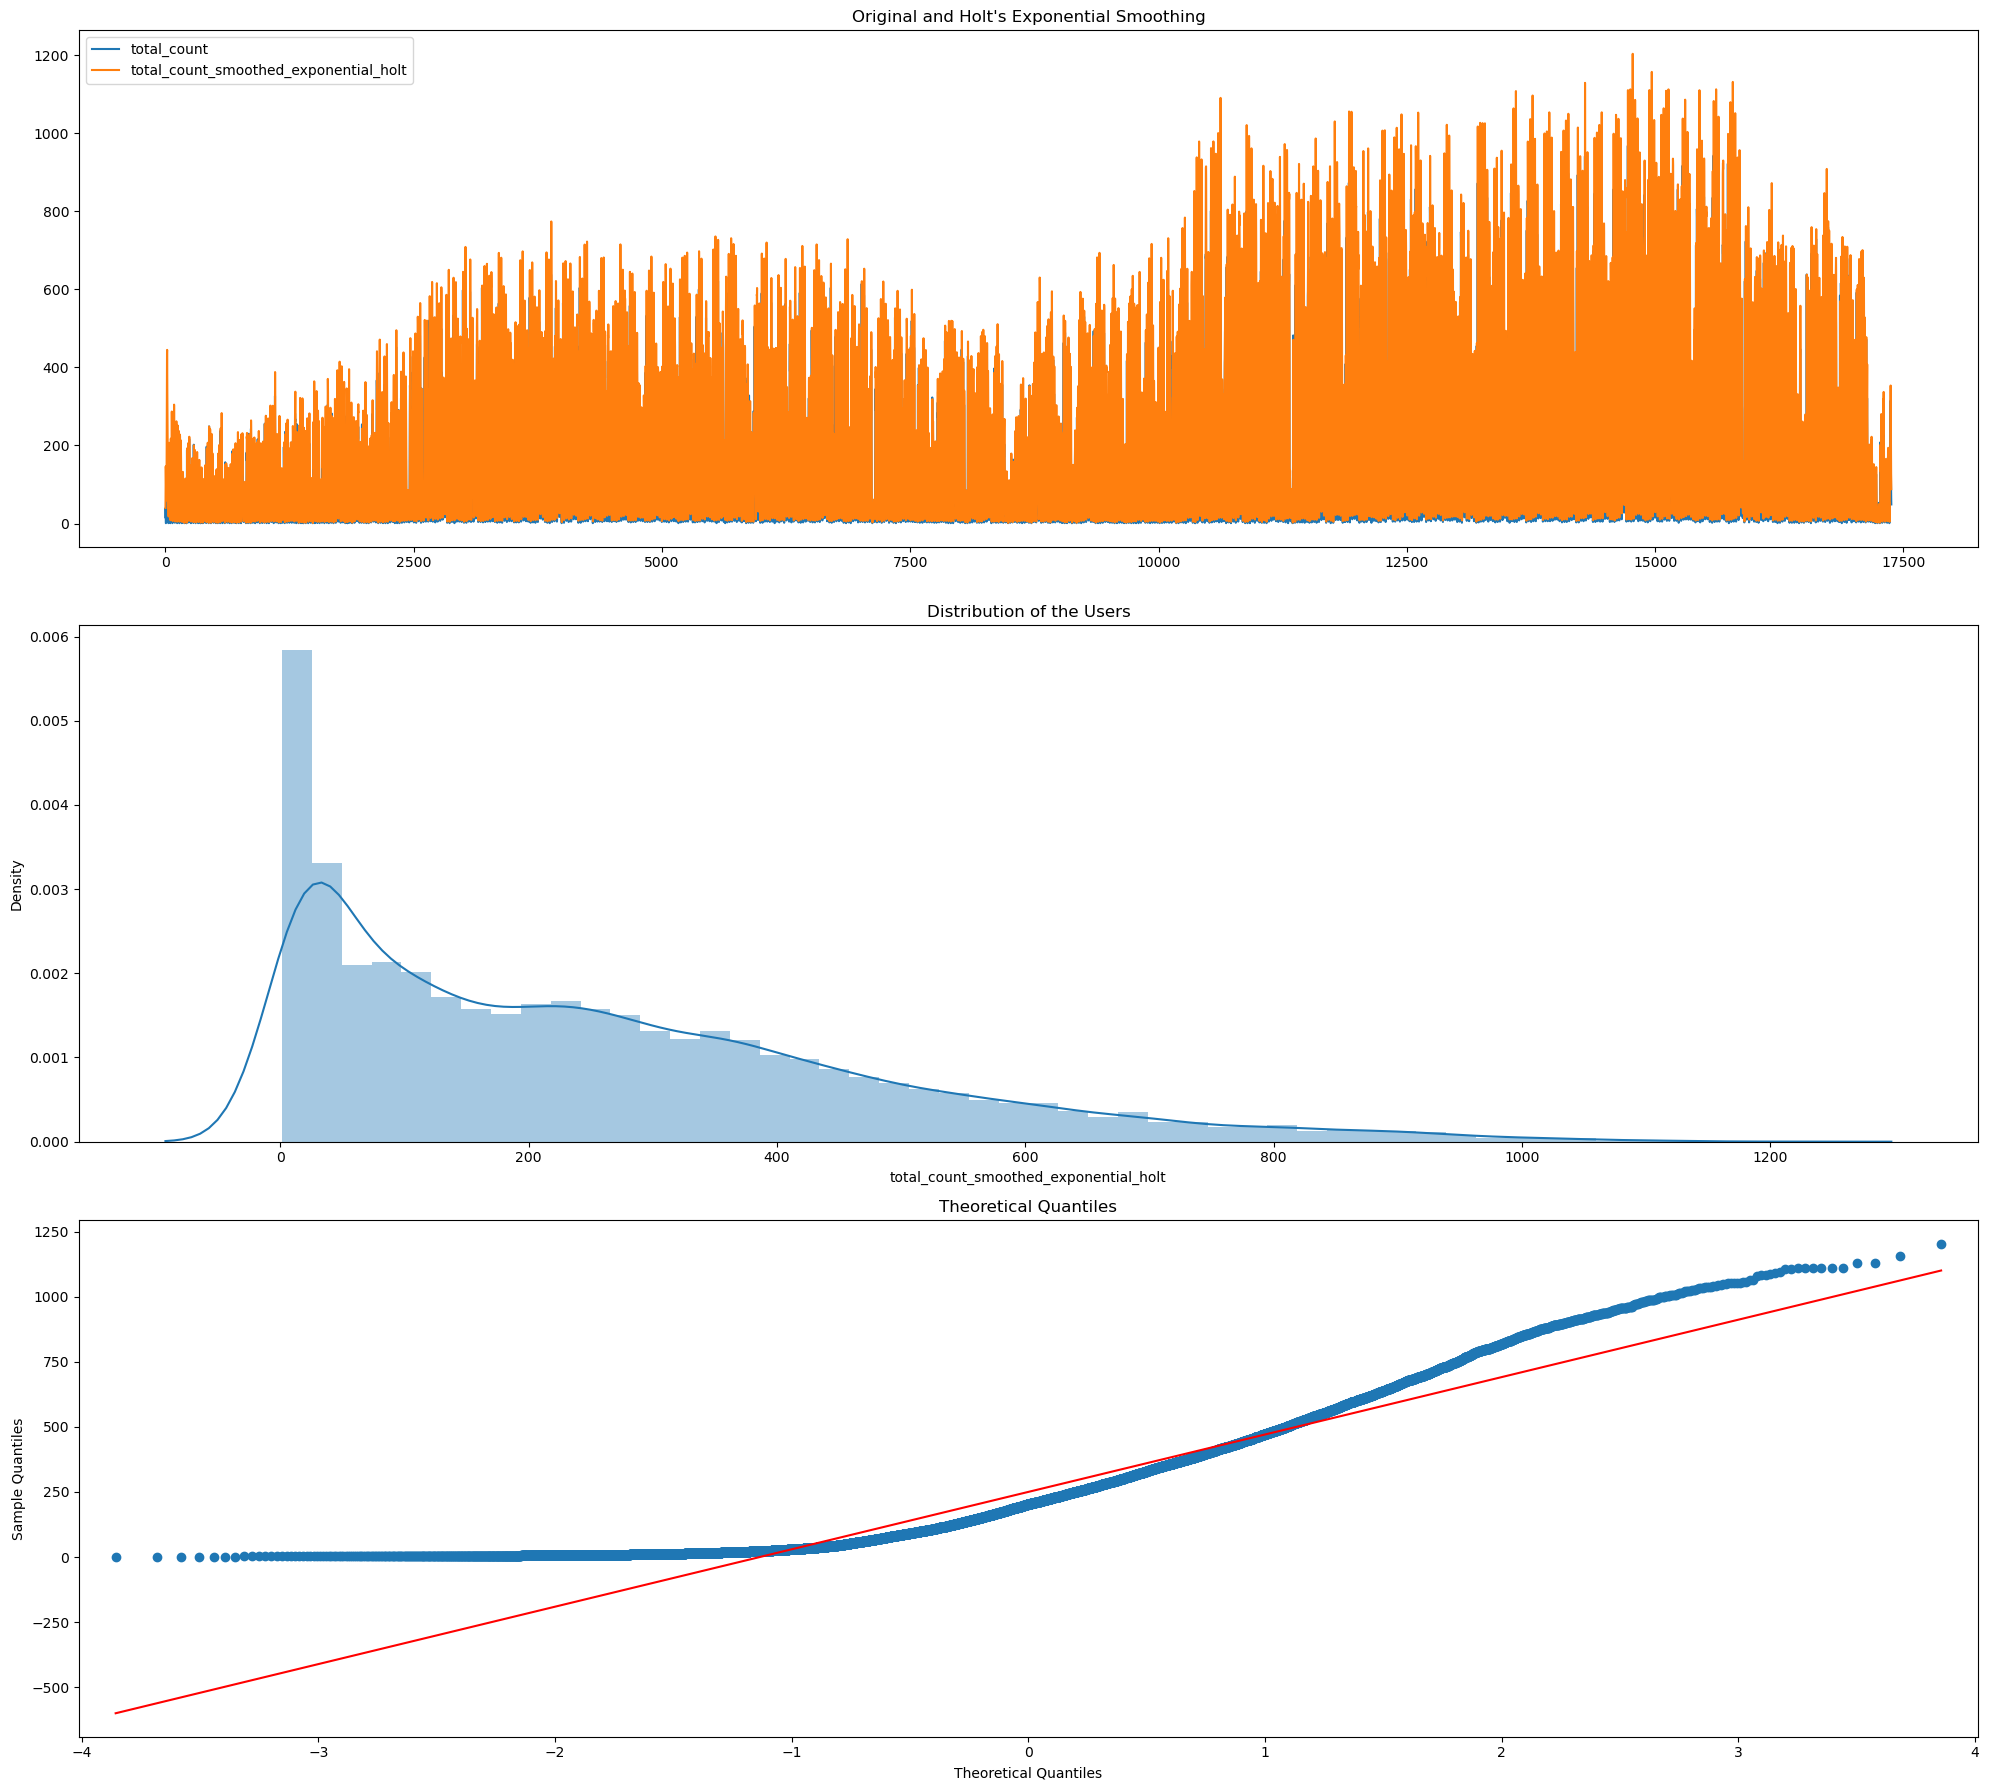

In [972]:
### exponential smoothing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import Holt
from statsmodels.graphics.gofplots import qqplot

data['total_count_smoothed_exponential_holt'] = Holt(data['total_count'], exponential=True).fit().fittedvalues

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))

data[['total_count', 'total_count_smoothed_exponential_holt']].plot(ax=ax1)
ax1.set(title='Original and Holt\'s Exponential Smoothing')

sns.distplot(data['total_count_smoothed_exponential_holt'], ax=ax2)
ax2.set(title='Distribution of the Users')

qqplot(data['total_count_smoothed_exponential_holt'], ax=ax3, line='s')
ax3.set(title='Theoretical Quantiles')

plt.tight_layout()
plt.show()


C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\2615173692.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count_smoothed_savgol'], ax=ax2)


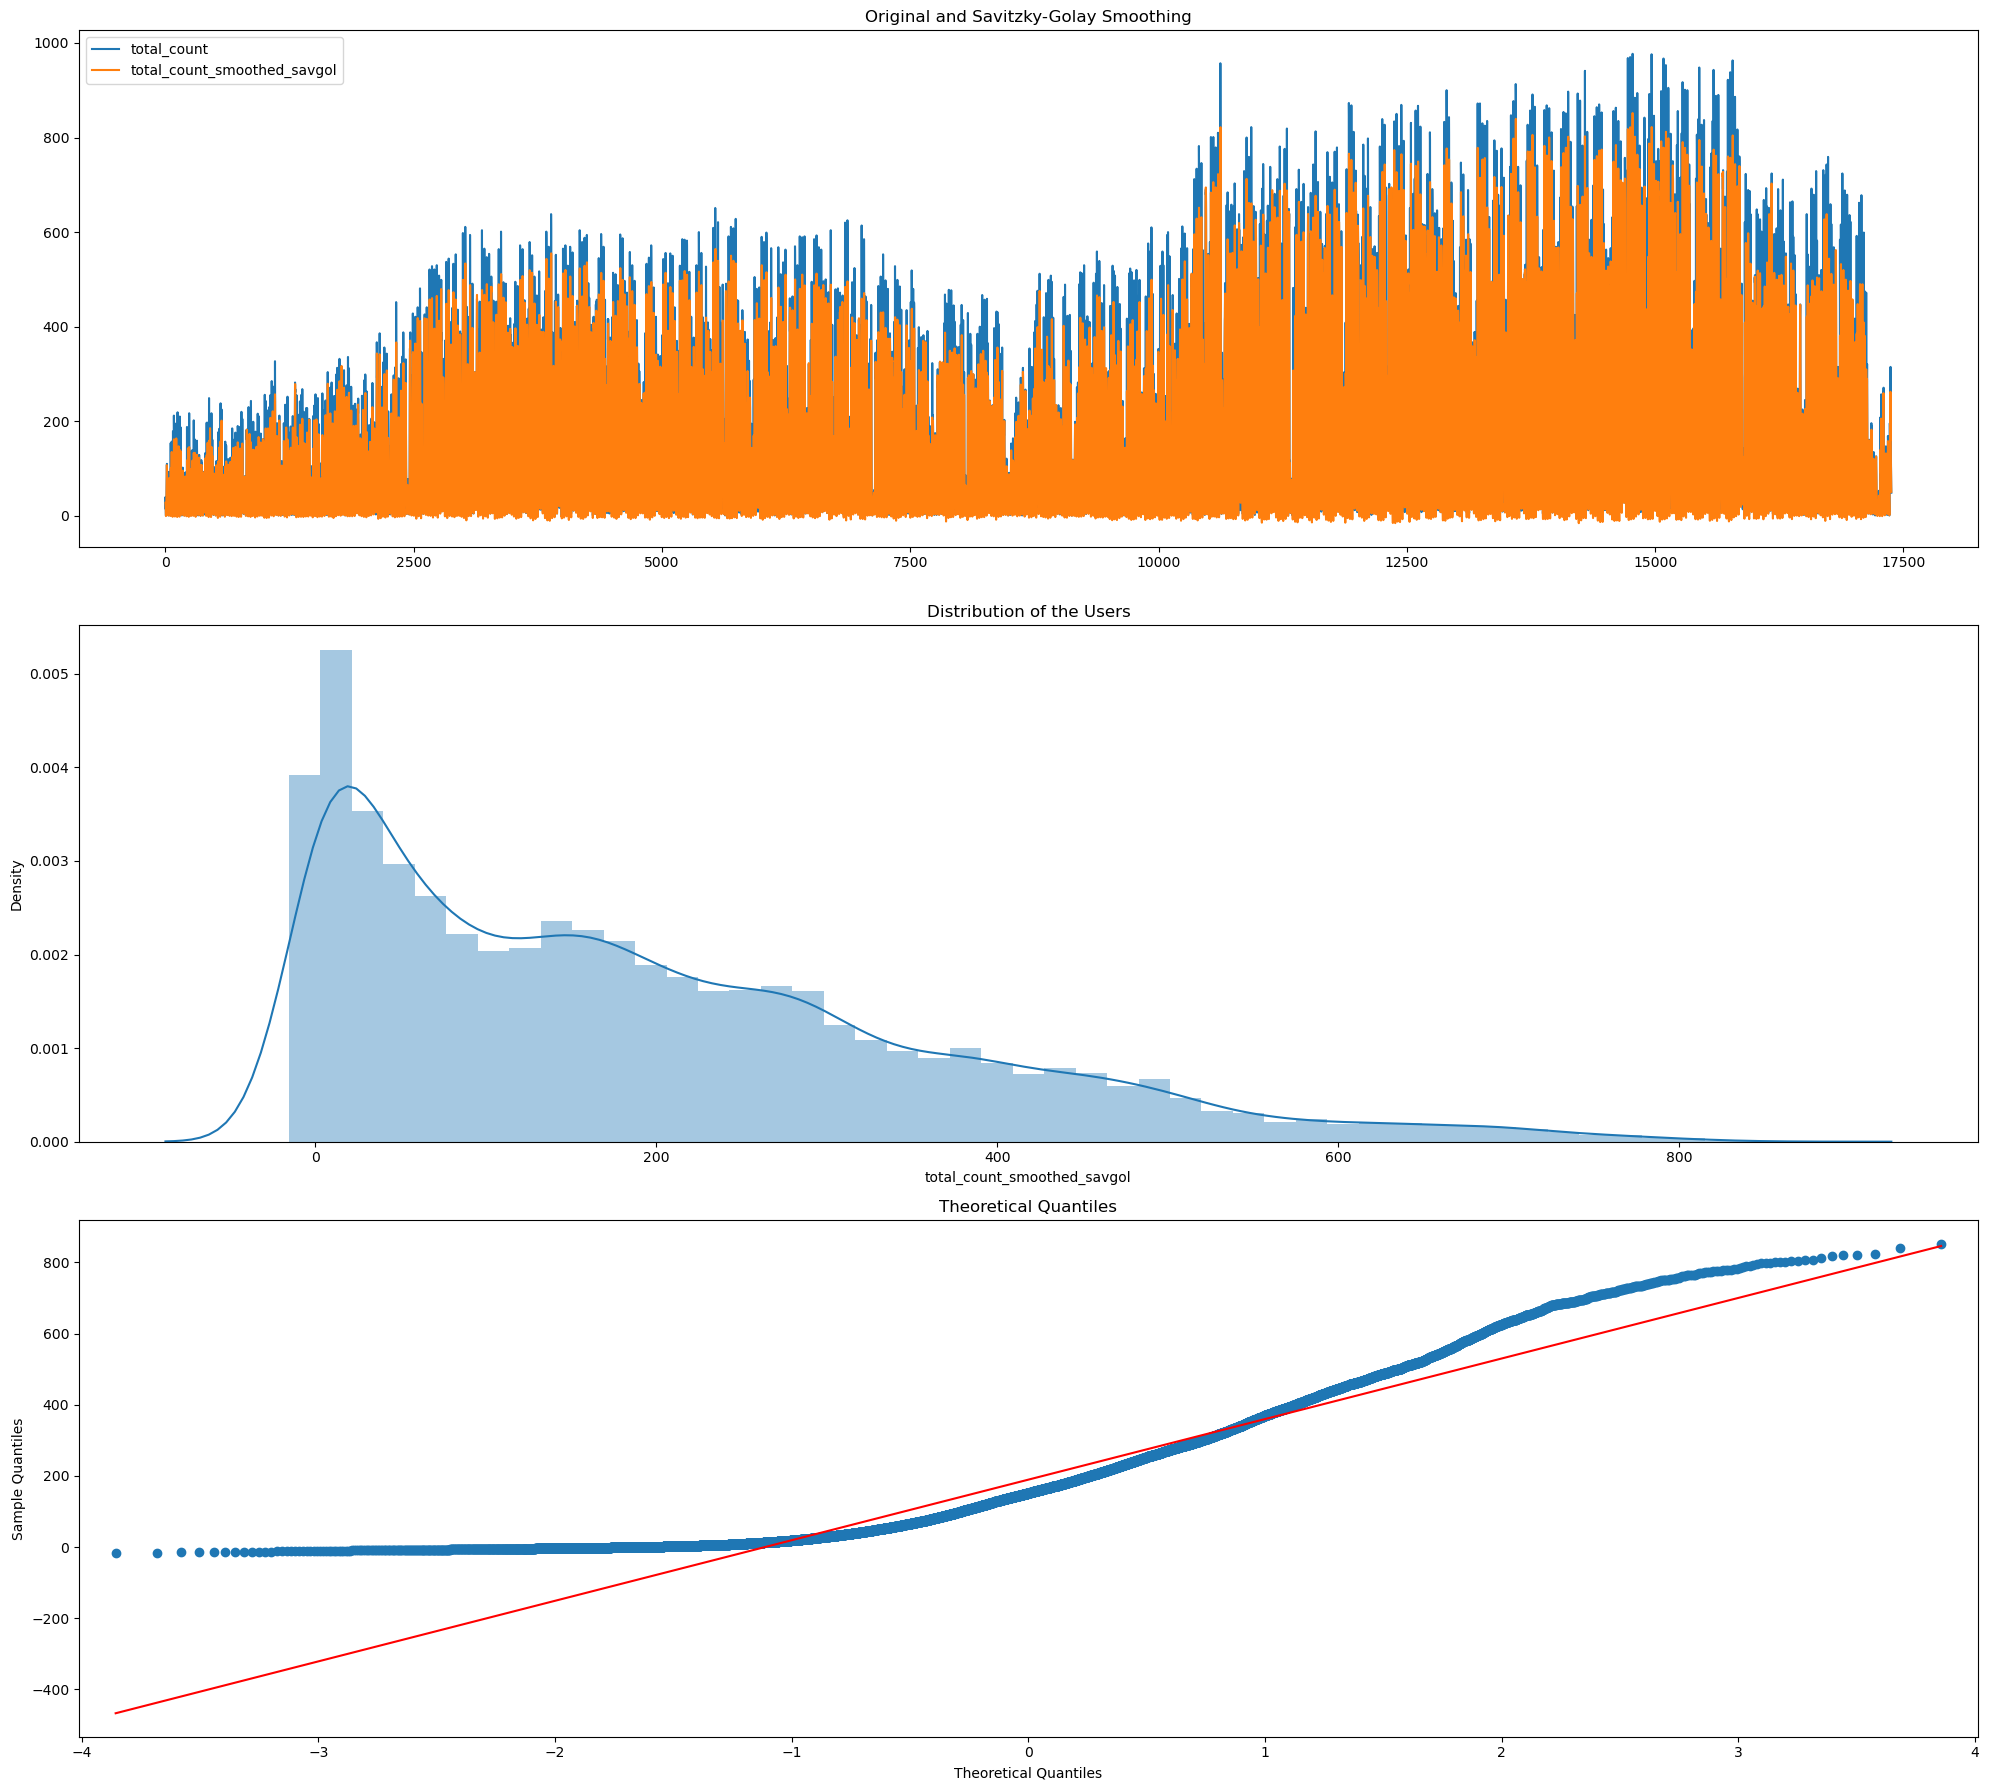

In [973]:
#savgol
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
from statsmodels.graphics.gofplots import qqplot

data['total_count_smoothed_savgol'] = savgol_filter(data['total_count'], window_length=7, polyorder=2)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))

data[['total_count', 'total_count_smoothed_savgol']].plot(ax=ax1)
ax1.set(title='Original and Savitzky-Golay Smoothing')

sns.distplot(data['total_count_smoothed_savgol'], ax=ax2)
ax2.set(title='Distribution of the Users')

qqplot(data['total_count_smoothed_savgol'], ax=ax3, line='s')
ax3.set(title='Theoretical Quantiles')

plt.tight_layout()
plt.show()


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\1370770641.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count_smoothed_damped_holt'], ax=ax2)


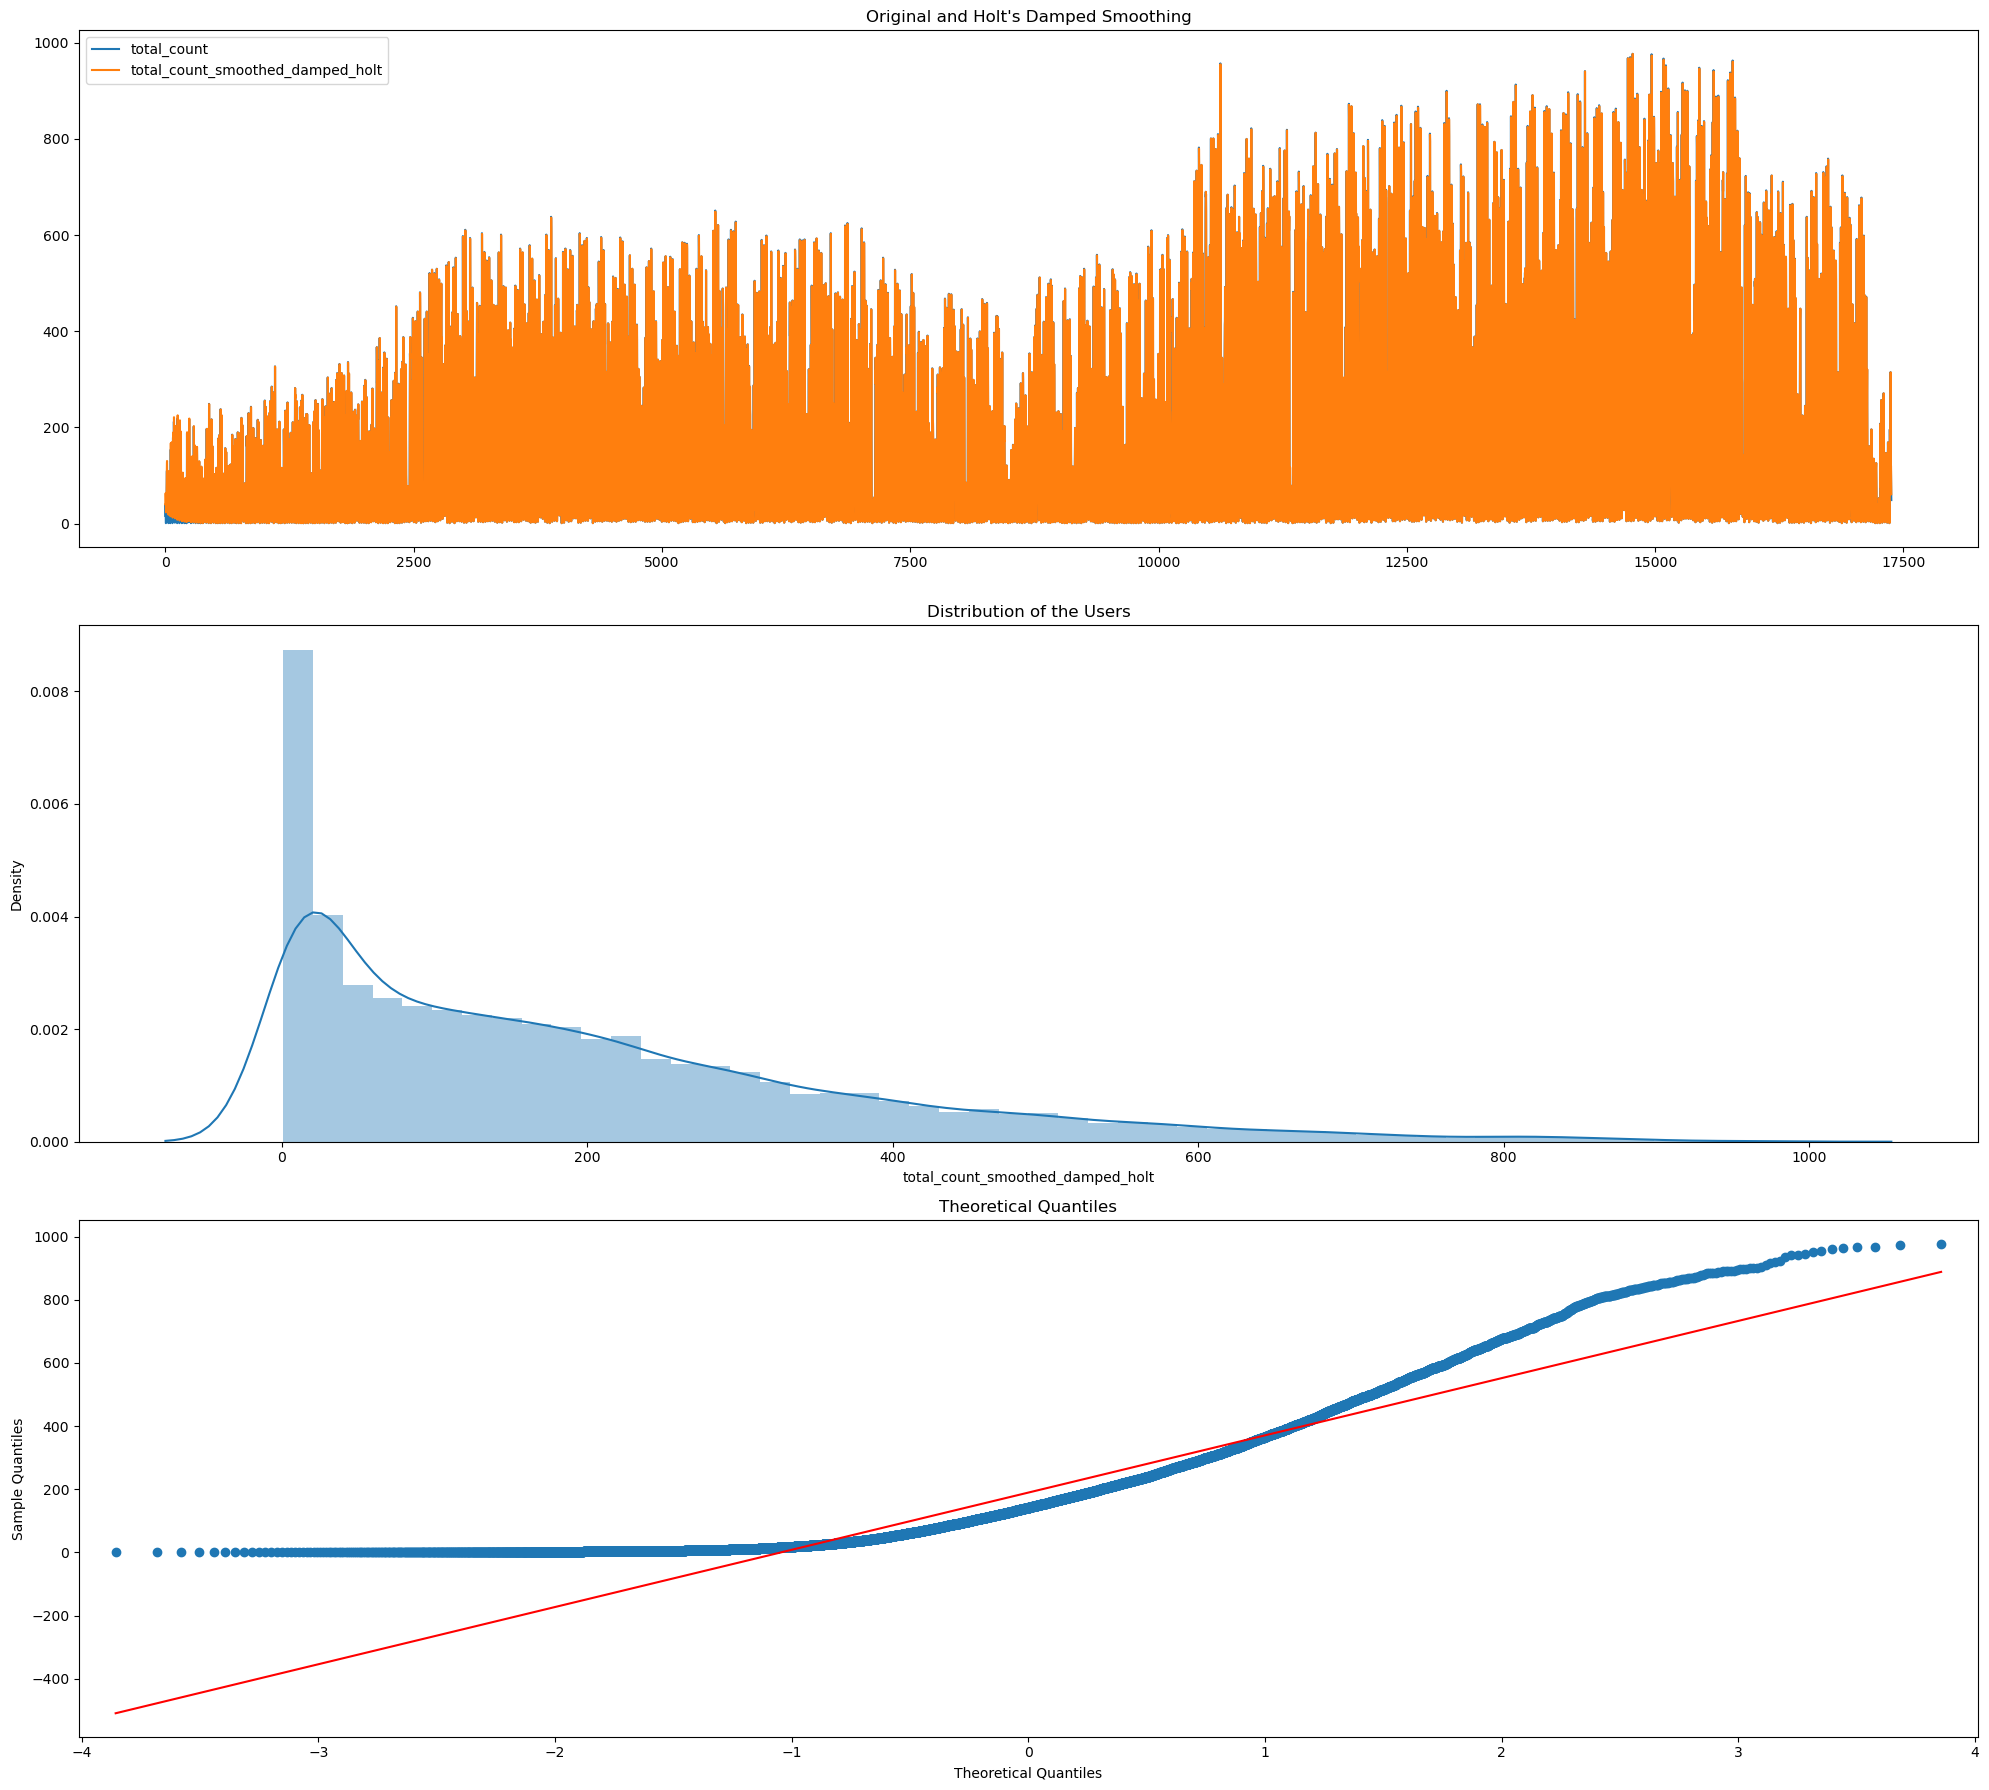

In [974]:
#damped holt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import Holt
from statsmodels.graphics.gofplots import qqplot

data['total_count_smoothed_damped_holt'] = Holt(data['total_count'], damped_trend=True).fit().fittedvalues

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))

data[['total_count', 'total_count_smoothed_damped_holt']].plot(ax=ax1)
ax1.set(title='Original and Holt\'s Damped Smoothing')

sns.distplot(data['total_count_smoothed_damped_holt'], ax=ax2)
ax2.set(title='Distribution of the Users')

qqplot(data['total_count_smoothed_damped_holt'], ax=ax3, line='s')
ax3.set(title='Theoretical Quantiles')

plt.tight_layout()
plt.show()


C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\2668004848.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count_smoothed_kalman'], ax=ax2)


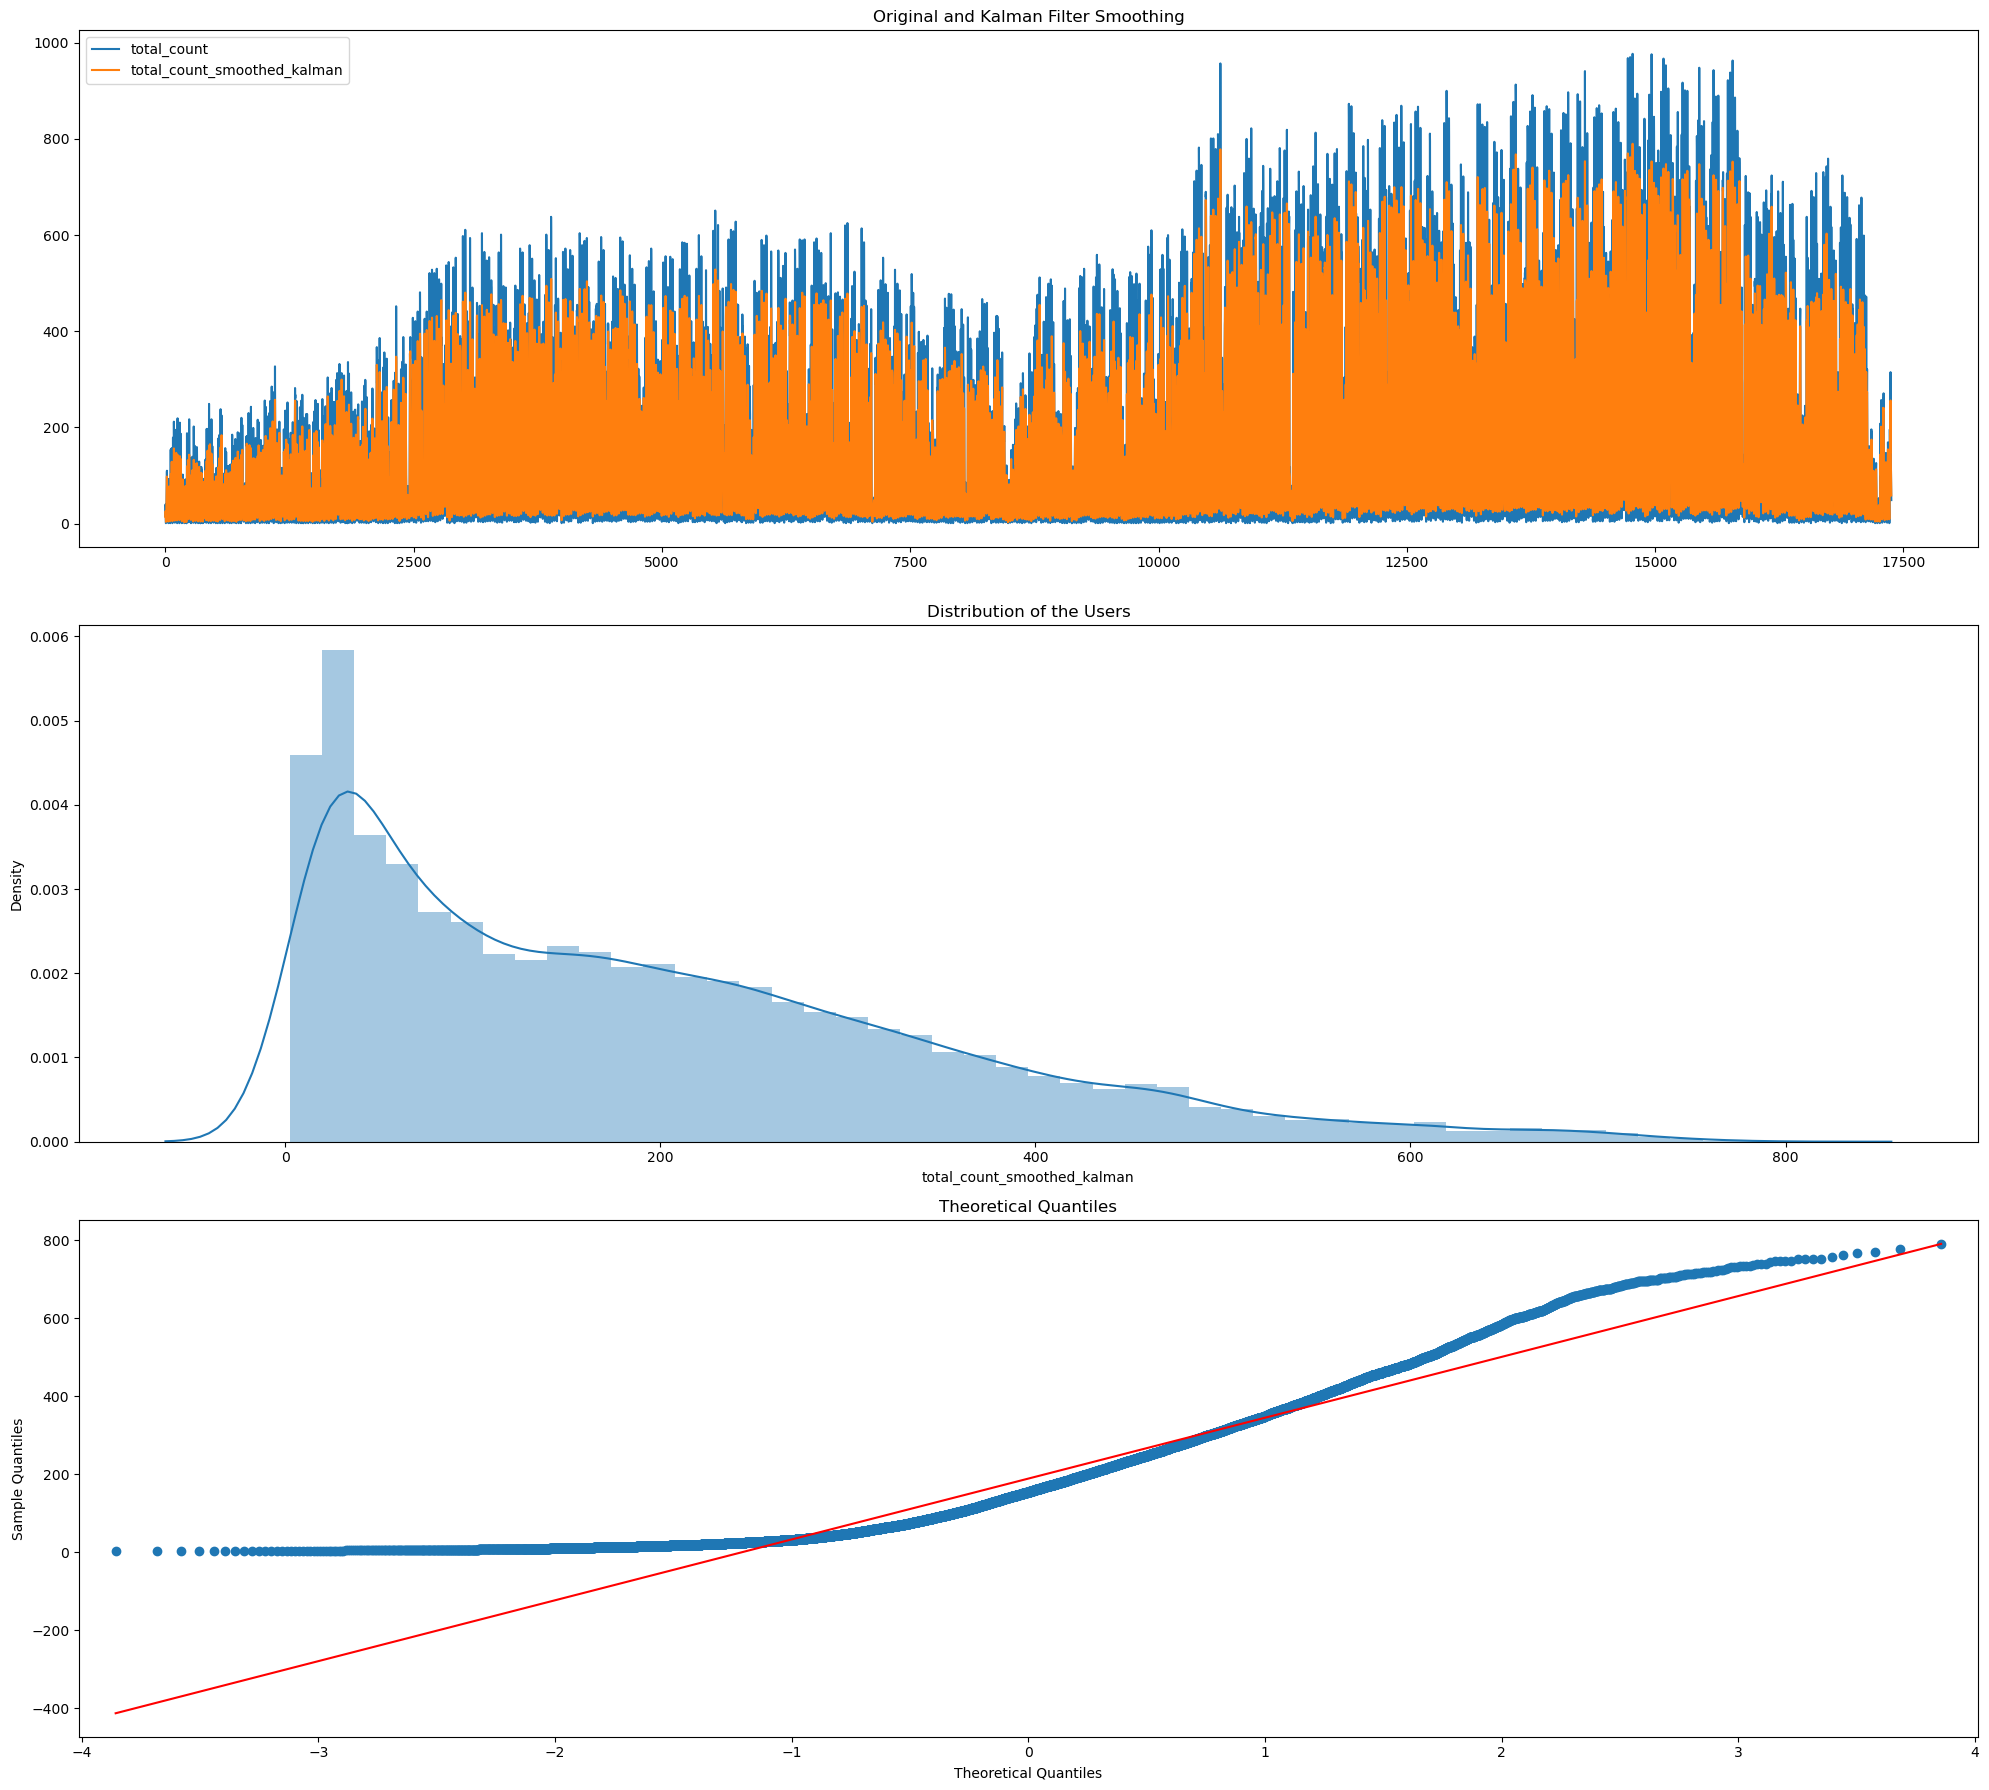

In [975]:
## kalman filter 
from pykalman import KalmanFilter
import numpy as np

kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

measurements = np.asarray(data['total_count'])  
smoothed_measurements, _ = kf.smooth(measurements)

data['total_count_smoothed_kalman'] = smoothed_measurements

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))

data[['total_count', 'total_count_smoothed_kalman']].plot(ax=ax1)
ax1.set(title='Original and Kalman Filter Smoothing')

sns.distplot(data['total_count_smoothed_kalman'], ax=ax2)
ax2.set(title='Distribution of the Users')

qqplot(data['total_count_smoothed_kalman'], ax=ax3, line='s')
ax3.set(title='Theoretical Quantiles')

plt.tight_layout()
plt.show()


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\892644551.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count_smoothed_tdf'], ax=ax2)
c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\pandas\core\series.py:953: ComplexWarning: Casting complex values to re

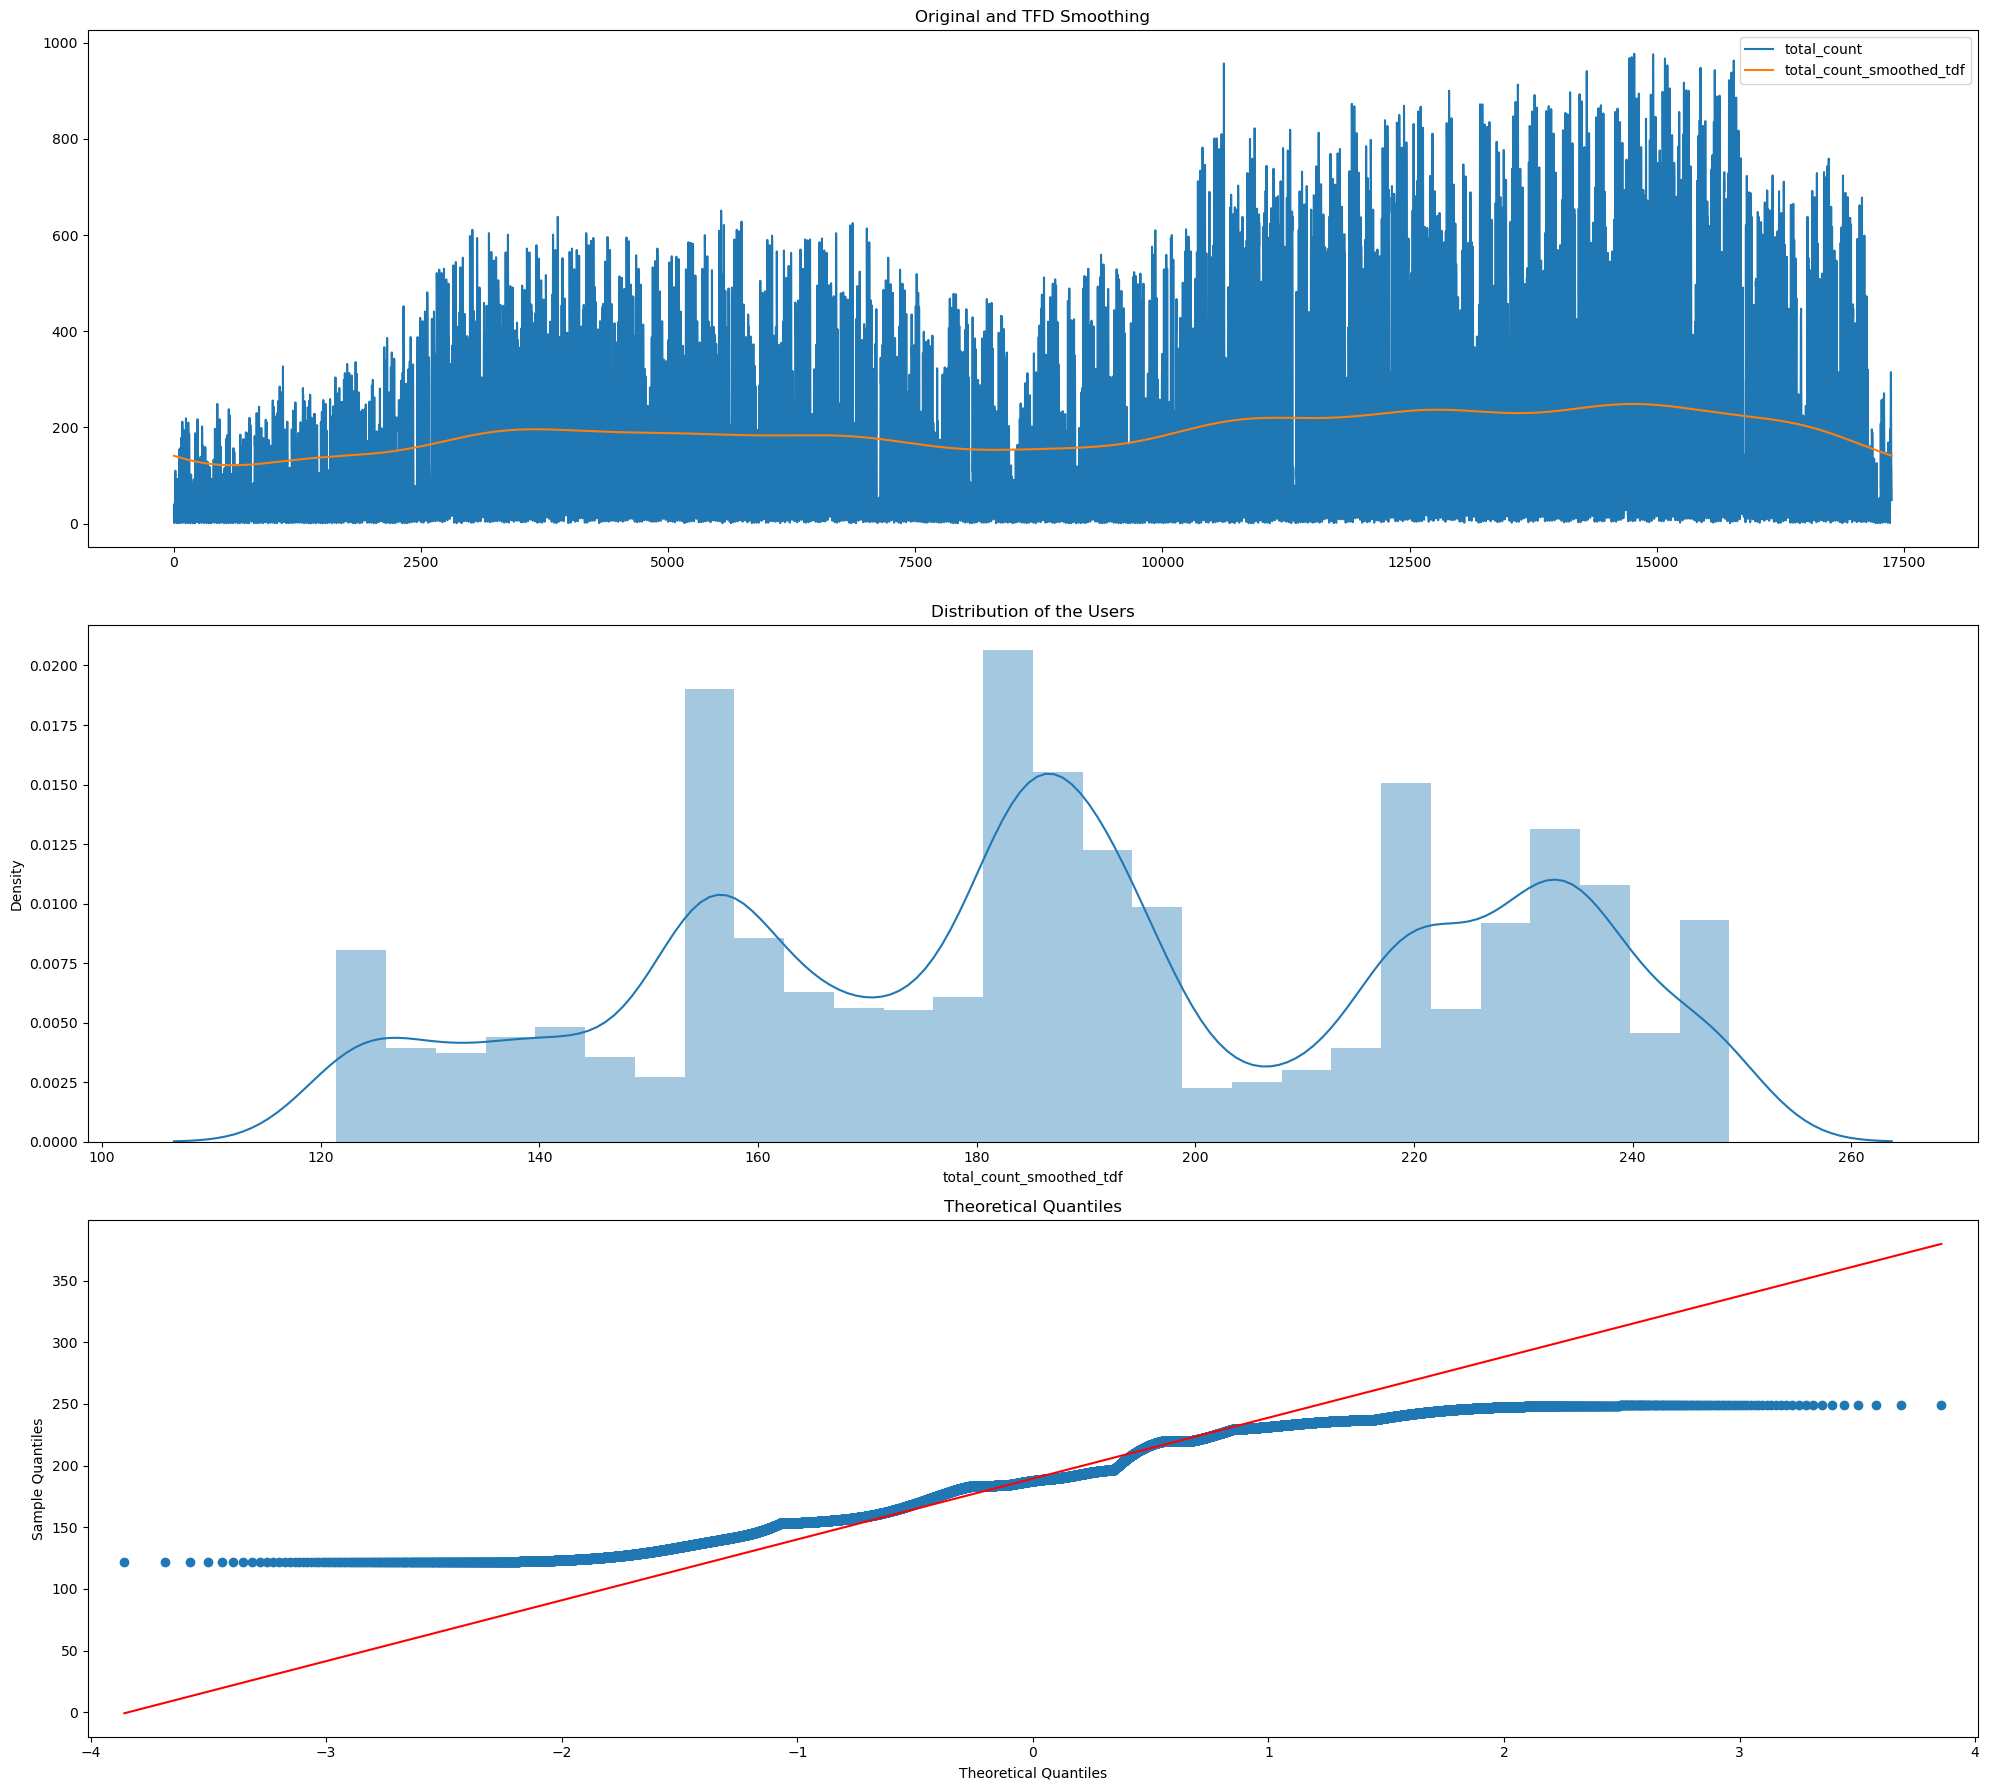

In [976]:
#Transformee de fourier
import numpy as np
from scipy.fft import fft, ifft


dd = np.asarray(np.asarray(data['total_count']))  

data_fft = fft(dd)

data_fft[10:] = 0

data_smooth = ifft(data_fft)

data['total_count_smoothed_tdf'] = data_smooth

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))

data[['total_count', 'total_count_smoothed_tdf']].plot(ax=ax1)
ax1.set(title='Original and TFD Smoothing')

sns.distplot(data['total_count_smoothed_tdf'], ax=ax2)
ax2.set(title='Distribution of the Users')

qqplot(data['total_count_smoothed_tdf'], ax=ax3, line='s')
ax3.set(title='Theoretical Quantiles')

plt.tight_layout()
plt.show()

Je choisi la transformation qui se rapproche le plus de l'original et qui a une distribution normale car la majorie des methodes statistiques supposent que les donnees suivent une loi normale. Nous optons aussi pour le calcul de mse pour trier nos methodes de la meilleure a la pire.

In [977]:
from sklearn.metrics import mean_squared_error

def rank_methods(data, methods):
    mse_dict = {}

    for method in methods:
        mse = mean_squared_error(data['total_count'], data['total_count_smoothed_' + method])
        mse_dict[method] = mse

    ranked_methods = sorted(mse_dict, key=mse_dict.get)
    return ranked_methods


tdf has too complex data that is not supported in mse fucntion

In [978]:
ranked_methods = rank_methods(data, ['moving_average','log','kalman','holt','holt_winters', 'exponential_holt', 'damped_holt', 'savgol'])
print('The methods ranked from best to worst are:', ranked_methods)


The methods ranked from best to worst are: ['kalman', 'savgol', 'holt_winters', 'damped_holt', 'holt', 'moving_average', 'exponential_holt', 'log']


##### Adding frequency 
Add the right frequency to your smoothed time series et justify your choices

In [979]:
data['datetime'] = pd.to_datetime(data['date'].dt.strftime('%Y-%m-%d') + ' ' + data['hour'].astype(str) + ':00:00')

data.set_index('datetime', inplace=True)

ts = pd.Series(data=data['total_count_smoothed_kalman'].values, index=data.index)

ts = ts.asfreq('H')


In [980]:
ts

datetime
2011-01-01 00:00:00     14.026656
2011-01-01 01:00:00     26.079968
2011-01-01 02:00:00     24.213248
2011-01-01 03:00:00     14.559775
2011-01-01 04:00:00      6.466077
                          ...    
2012-12-31 19:00:00    117.845461
2012-12-31 20:00:00     97.352676
2012-12-31 21:00:00     85.212568
2012-12-31 22:00:00     68.285027
2012-12-31 23:00:00     58.642514
Freq: H, Length: 17544, dtype: float64

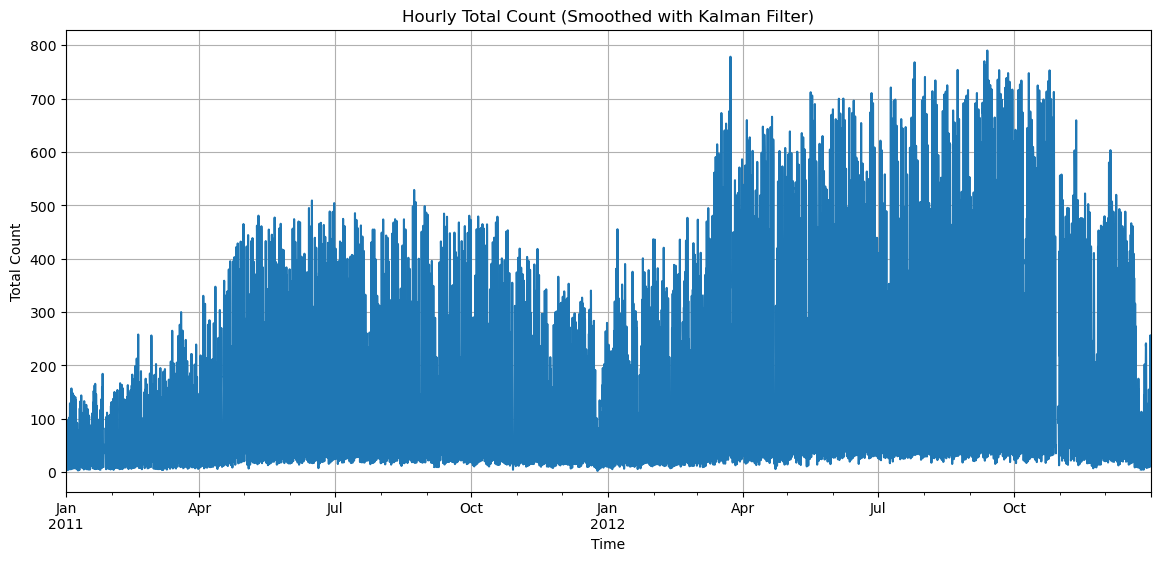

In [981]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
ts.plot()
plt.title('Hourly Total Count (Smoothed with Kalman Filter)')
plt.xlabel('Time')
plt.ylabel('Total Count')
plt.grid(True)
plt.show()


In [982]:
ts.dropna(inplace=True)

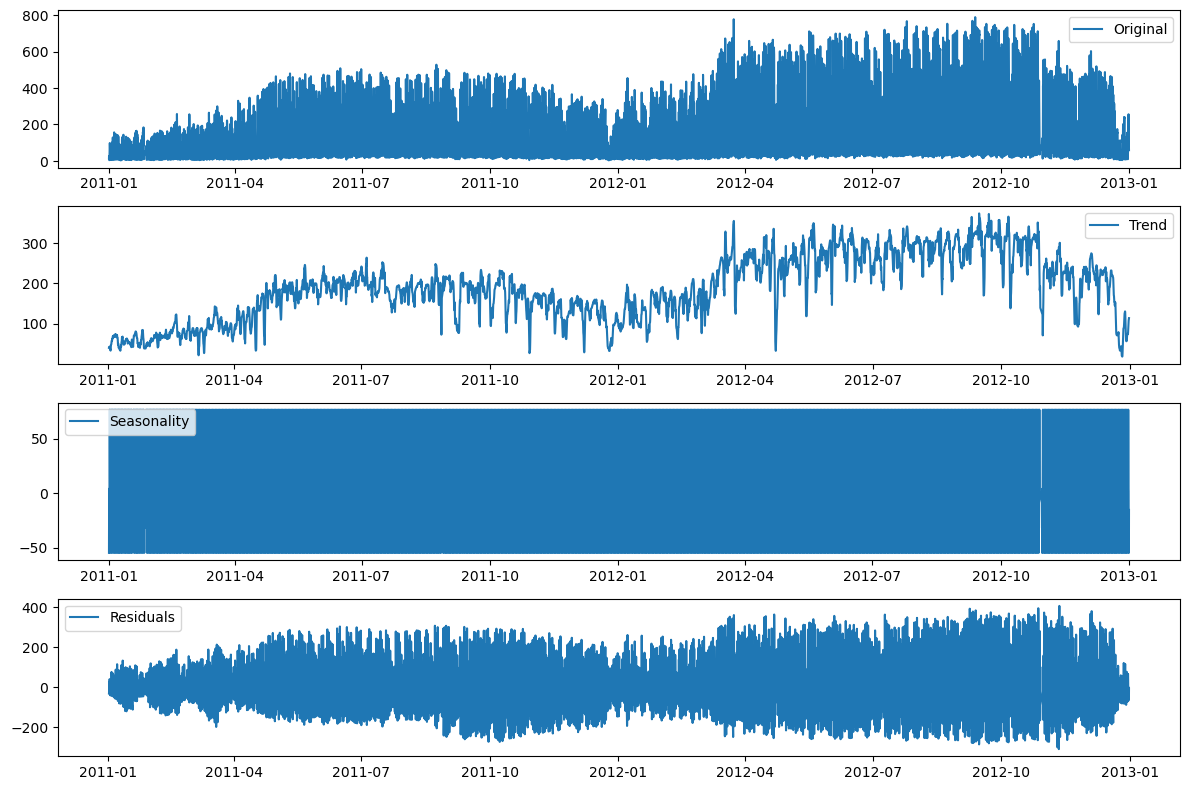

In [983]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(ts.dropna(), model='additive', period=24)

# Plot the original time series, the trend, the seasonality, and the residuals 
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [984]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

print('Mean:', ts.resample('D').mean())
print('Standard Deviation:', ts.resample('D').std())

adf_result = adfuller(ts)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
for key, value in adf_result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

kpss_result = kpss(ts)
print('\nKPSS Statistic: %f' % kpss_result[0])
print('p-value: %f' % kpss_result[1])
for key, value in kpss_result[3].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


Mean: datetime
2011-01-01     40.078683
2011-01-02     35.091951
2011-01-03     61.108838
2011-01-04     67.888496
2011-01-05     69.470618
                 ...    
2012-12-27     87.877056
2012-12-28    128.594934
2012-12-29     56.459806
2012-12-30     74.592037
2012-12-31    114.100388
Freq: D, Length: 731, dtype: float64
Standard Deviation: datetime
2011-01-01    30.694495
2011-01-02    26.122603
2011-01-03    37.251476
2011-01-04    44.628865
2011-01-05    44.075953
                ...    
2012-12-27    60.081861
2012-12-28    86.098082
2012-12-29    37.553105
2012-12-30    51.689299
2012-12-31    77.709201
Freq: D, Length: 731, dtype: float64
ADF Statistic: -6.3675354213524535
p-value: 2.389323263497591e-08
Critical Values:
   1%, -3.430727308679485
Critical Values:
   5%, -2.861706755762842
Critical Values:
   10%, -2.566858759781439

KPSS Statistic: 17.270734
p-value: 0.010000
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical 

C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\1224172016.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(ts)


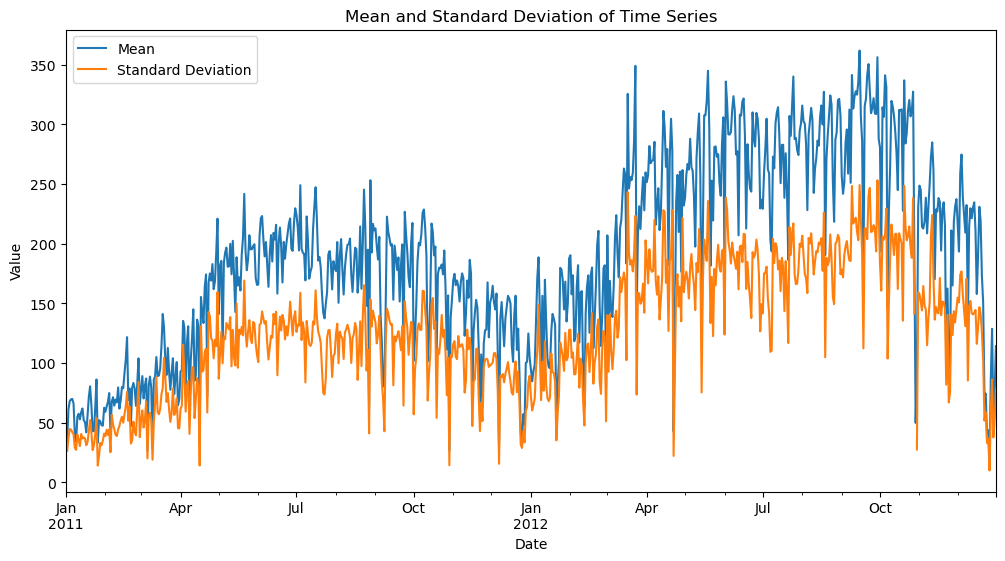

In [985]:
import matplotlib.pyplot as plt
##to prove it is not statitionary
mean = ts.resample('D').mean()
std_dev = ts.resample('D').std()

plt.figure(figsize=(12,6))

mean.plot(label='Mean')
std_dev.plot(label='Standard Deviation')

plt.title('Mean and Standard Deviation of Time Series')
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend(loc='best')

plt.show()


In [986]:
from statsmodels.tsa.stattools import adfuller, kpss

def is_stationary(ts):
    #print('Mean:', ts.resample('D').mean())
    #print('Standard Deviation:', ts.resample('D').std())

    #print('\nPerforming Augmented Dickey-Fuller test...')
    adf_result = adfuller(ts.dropna())
    #print(f'ADF Statistic: {adf_result[0]}')
    #print(f'p-value: {adf_result[1]}')
    #print('Critical Values:')
    #for key, value in adf_result[4].items():
        #print(f'   {key}, {value}')
    if adf_result[1] < 0.05:
        print('The series is likely stationary according to the ADF test.')
    else:
        print('The series is likely non-stationary according to the ADF test.')

    print('\nPerforming KPSS test...')
    kpss_result = kpss(ts.dropna())
    #print('KPSS Statistic: %f' % kpss_result[0])
    #print('p-value: %f' % kpss_result[1])
    #print('Critical Values:')
    #for key, value in kpss_result[3].items():
    #    print(f'   {key}, {value}')
    if kpss_result[1] > 0.05:
        print('The series is likely stationary according to the KPSS test.')
    else:
        print('The series is likely non-stationary according to the KPSS test.')

is_stationary(ts)


The series is likely stationary according to the ADF test.

Performing KPSS test...
The series is likely non-stationary according to the KPSS test.


C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\953118256.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(ts.dropna())


In [987]:
col_index = data.columns.get_loc('total_count_smoothed_kalman')
data = data.iloc[:, :col_index+1]
data.columns
data.to_csv('hour_pre.csv')

##### Smoothing day 

On va choisir les trois premieres meilleurs transformations

In [988]:
data = pd.read_csv('bike+sharing+dataset/day.csv')
data = data.drop(columns=['instant'])


In [989]:
data['dteday'] = pd.to_datetime(data['dteday'])
data['season'] = data.season.astype('category')
data['mnth'] = data.mnth.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weathersit'] = data.weathersit.astype('category')

#renomer les colonnes
data.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

- Smooth your time series and compare with the original


C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\991389005.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count'], ax=ax1)


[Text(0.5, 1.0, 'Theoritical quantiles')]

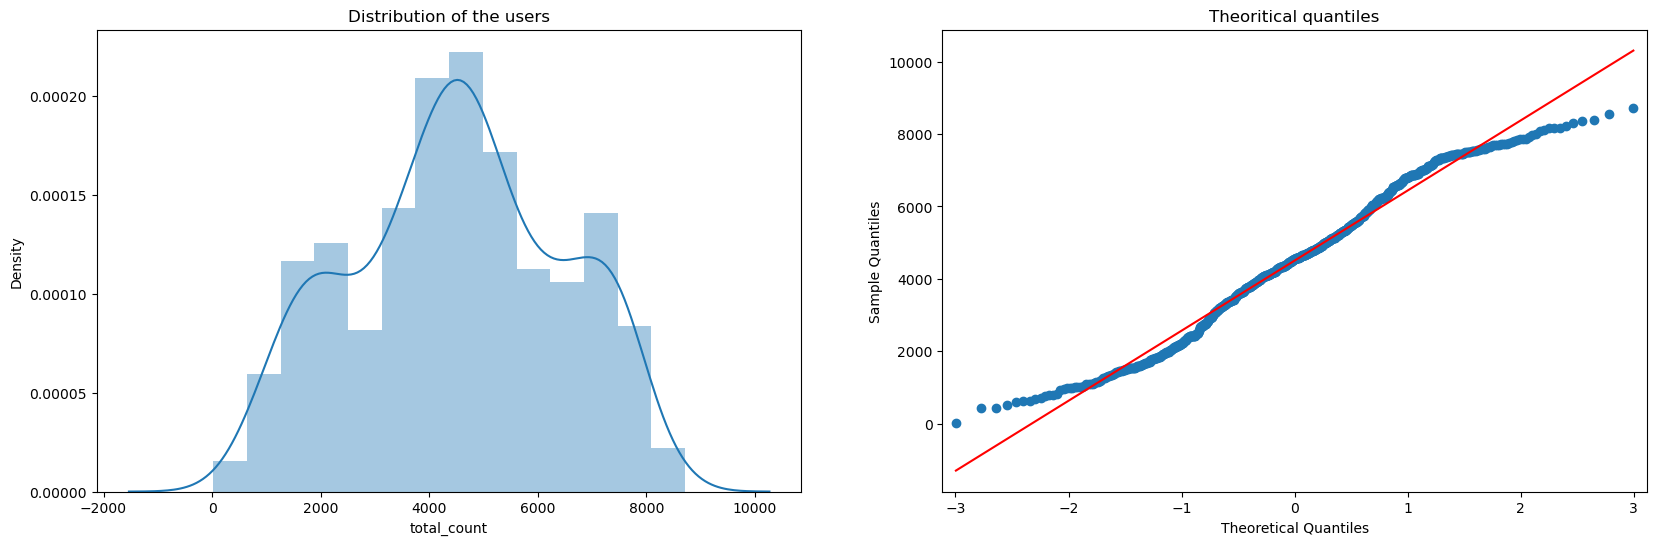

In [990]:
## original 
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(data['total_count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(data['total_count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

mtn, la distribution est plus uniforme, ce qui signifie que les données ont été converties. Les données dans les quantiles théoriques sont plus proches à la ligne rouge.

C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\30476537.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count_smoothed_kalman'], ax=ax2)


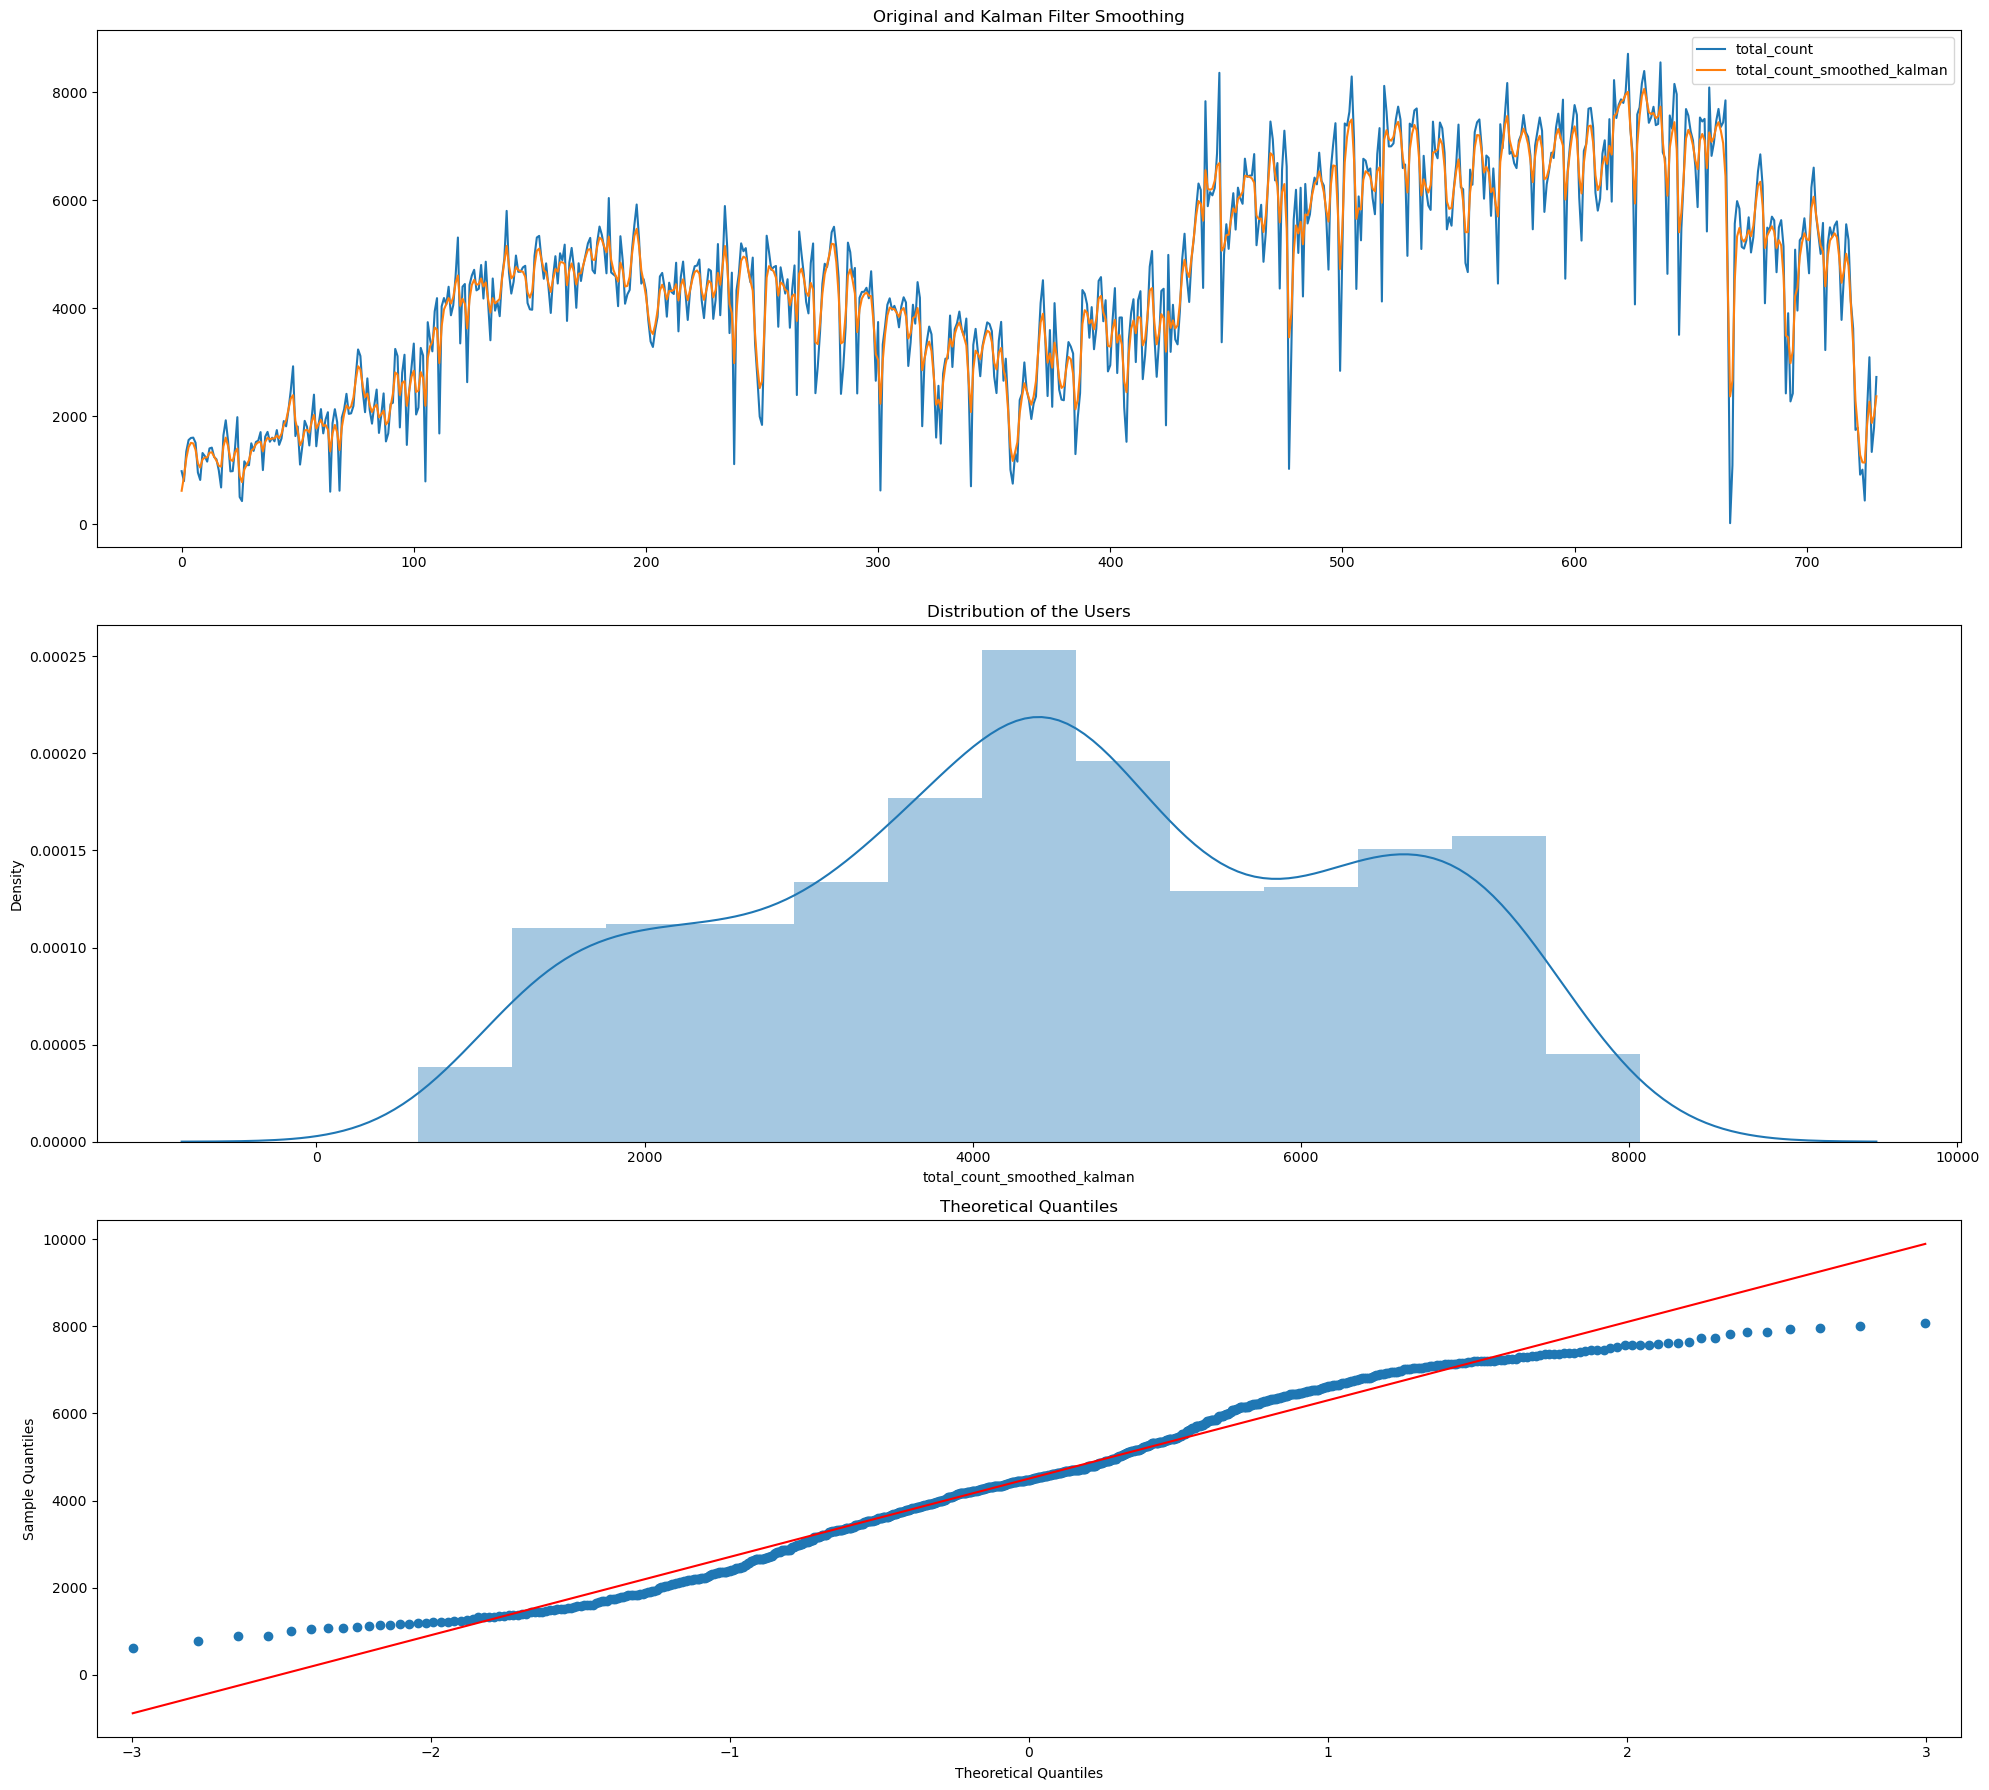

In [991]:
## kalman filter 
from pykalman import KalmanFilter
import numpy as np

kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

measurements = np.asarray(data['total_count'])  
smoothed_measurements, _ = kf.smooth(measurements)

data['total_count_smoothed_kalman'] = smoothed_measurements

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))

data[['total_count', 'total_count_smoothed_kalman']].plot(ax=ax1)
ax1.set(title='Original and Kalman Filter Smoothing')

sns.distplot(data['total_count_smoothed_kalman'], ax=ax2)
ax2.set(title='Distribution of the Users')

qqplot(data['total_count_smoothed_kalman'], ax=ax3, line='s')
ax3.set(title='Theoretical Quantiles')

plt.tight_layout()
plt.show()

C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\785600710.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count_smoothed_savgol'], ax=ax2)


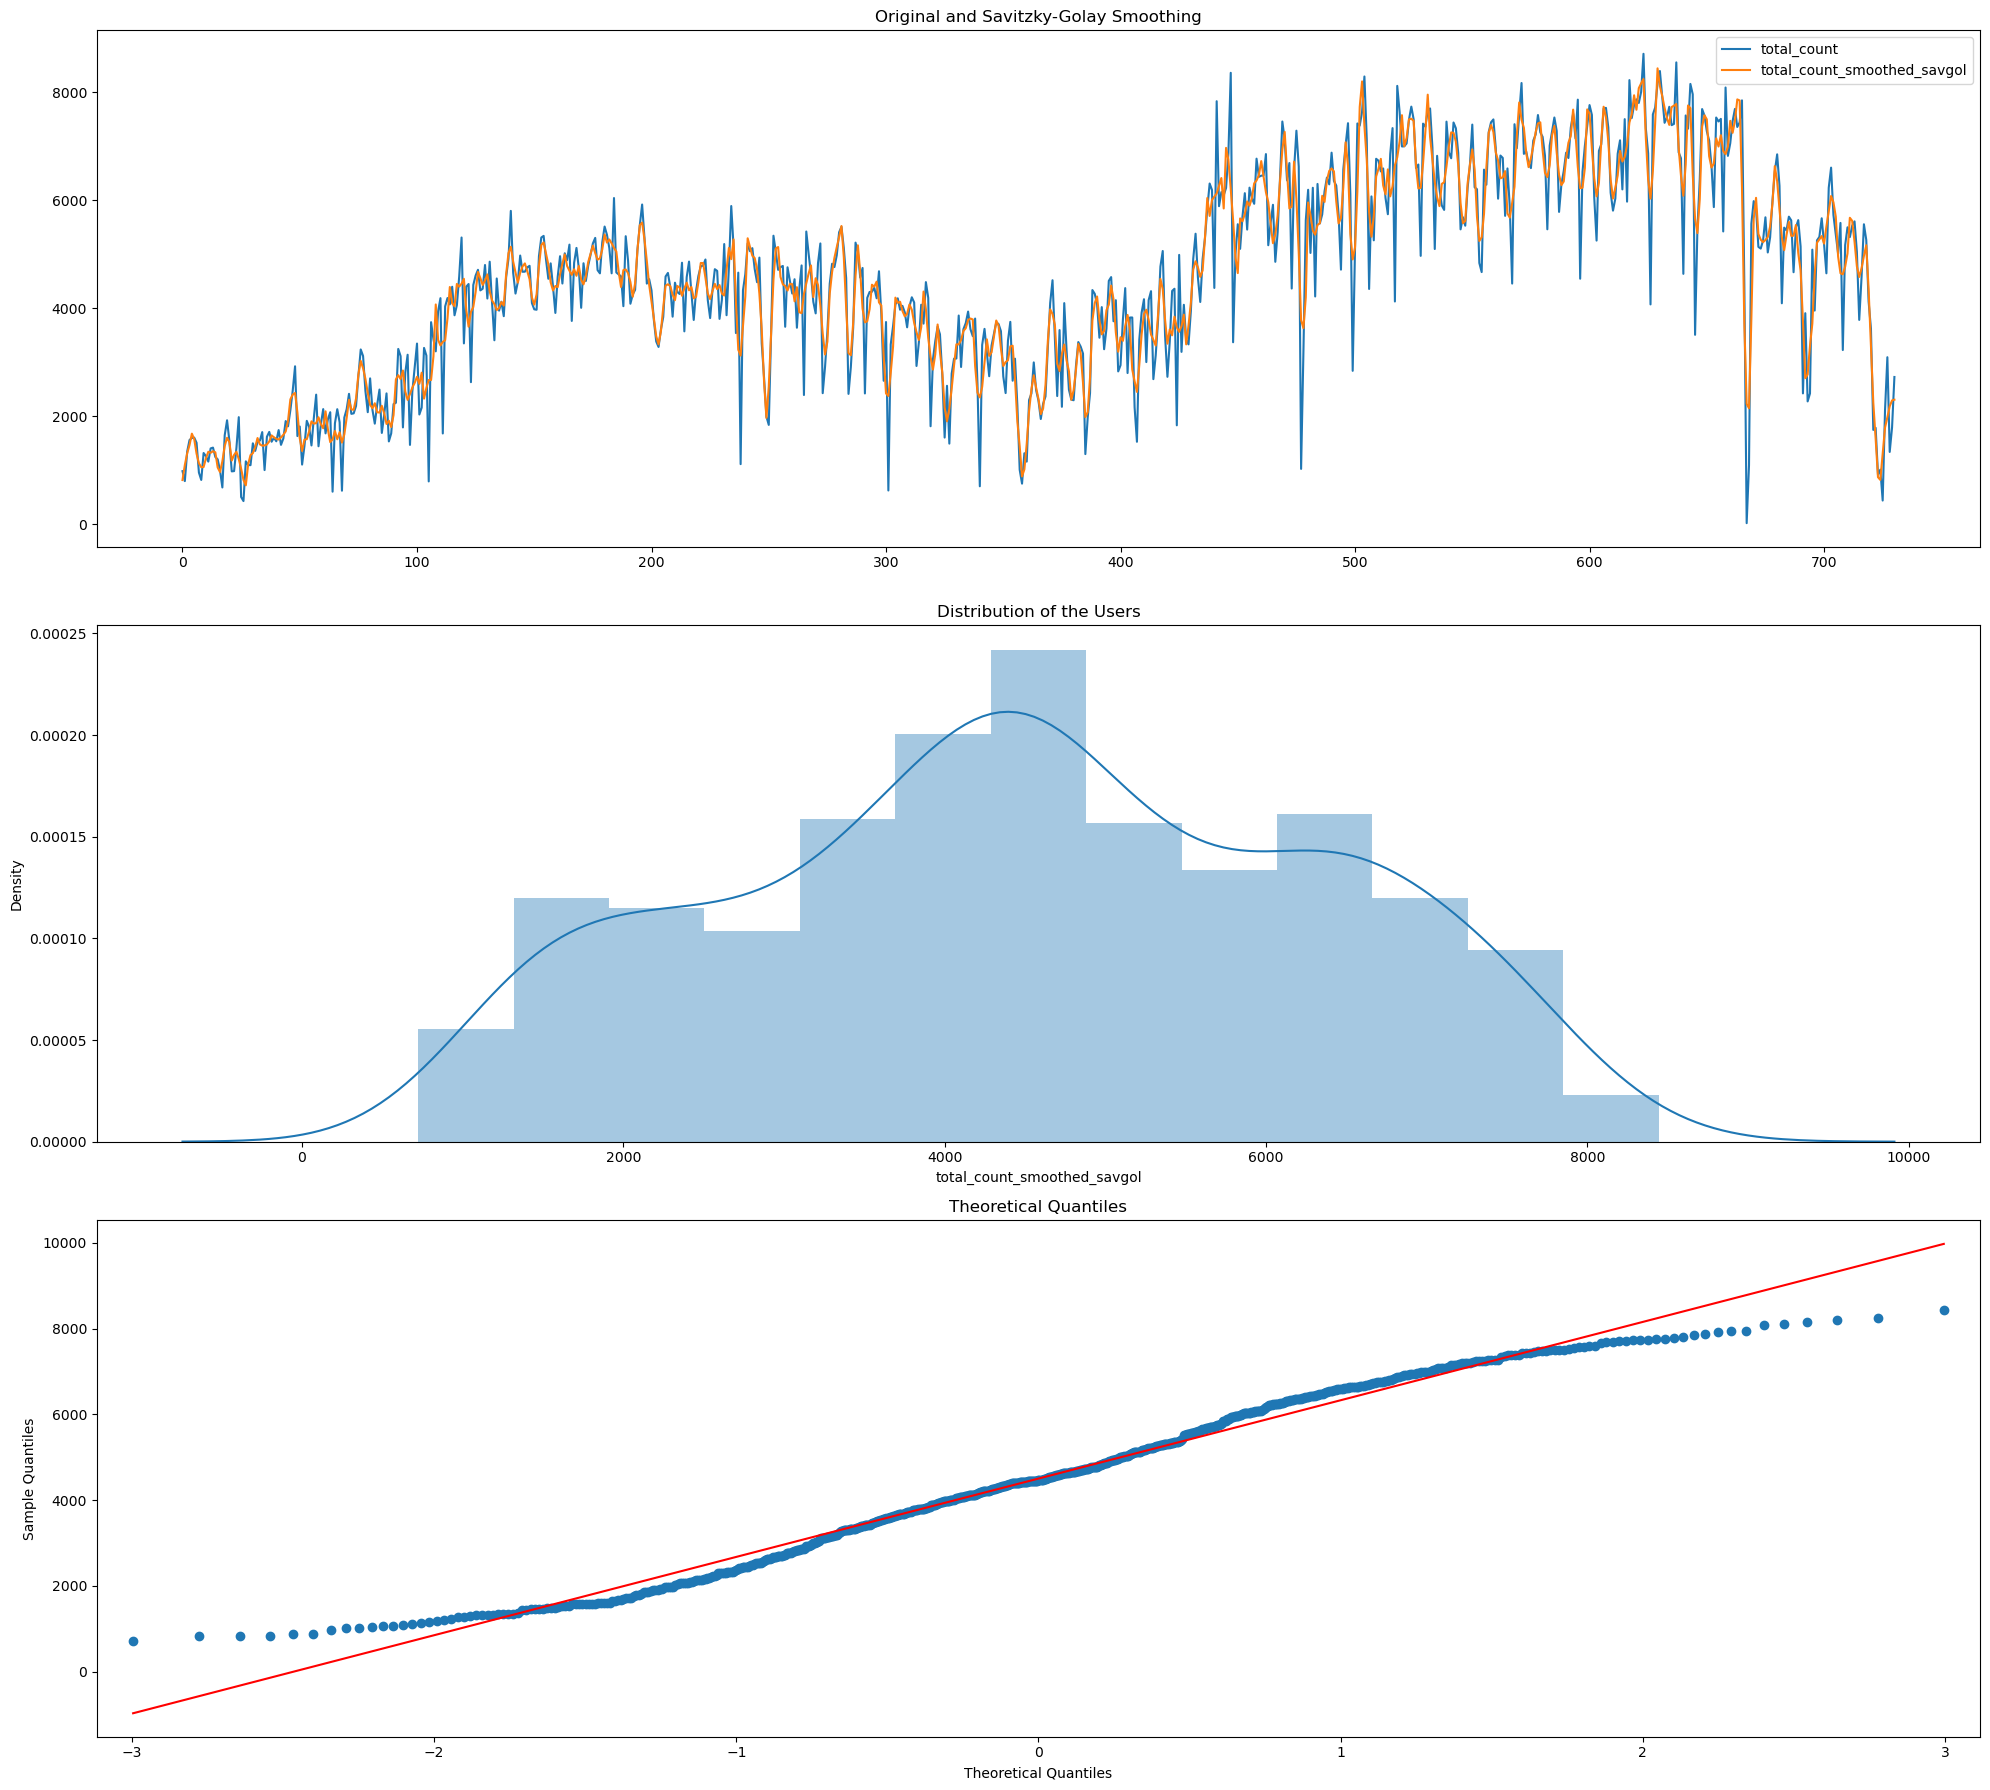

In [992]:
#savgol filter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
from statsmodels.graphics.gofplots import qqplot

data['total_count_smoothed_savgol'] = savgol_filter(data['total_count'], window_length=7, polyorder=2)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))

data[['total_count', 'total_count_smoothed_savgol']].plot(ax=ax1)
ax1.set(title='Original and Savitzky-Golay Smoothing')

sns.distplot(data['total_count_smoothed_savgol'], ax=ax2)
ax2.set(title='Distribution of the Users')

qqplot(data['total_count_smoothed_savgol'], ax=ax3, line='s')
ax3.set(title='Theoretical Quantiles')

plt.tight_layout()
plt.show()


C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\936171501.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count_smoothed_holt_winters'], ax=ax2)


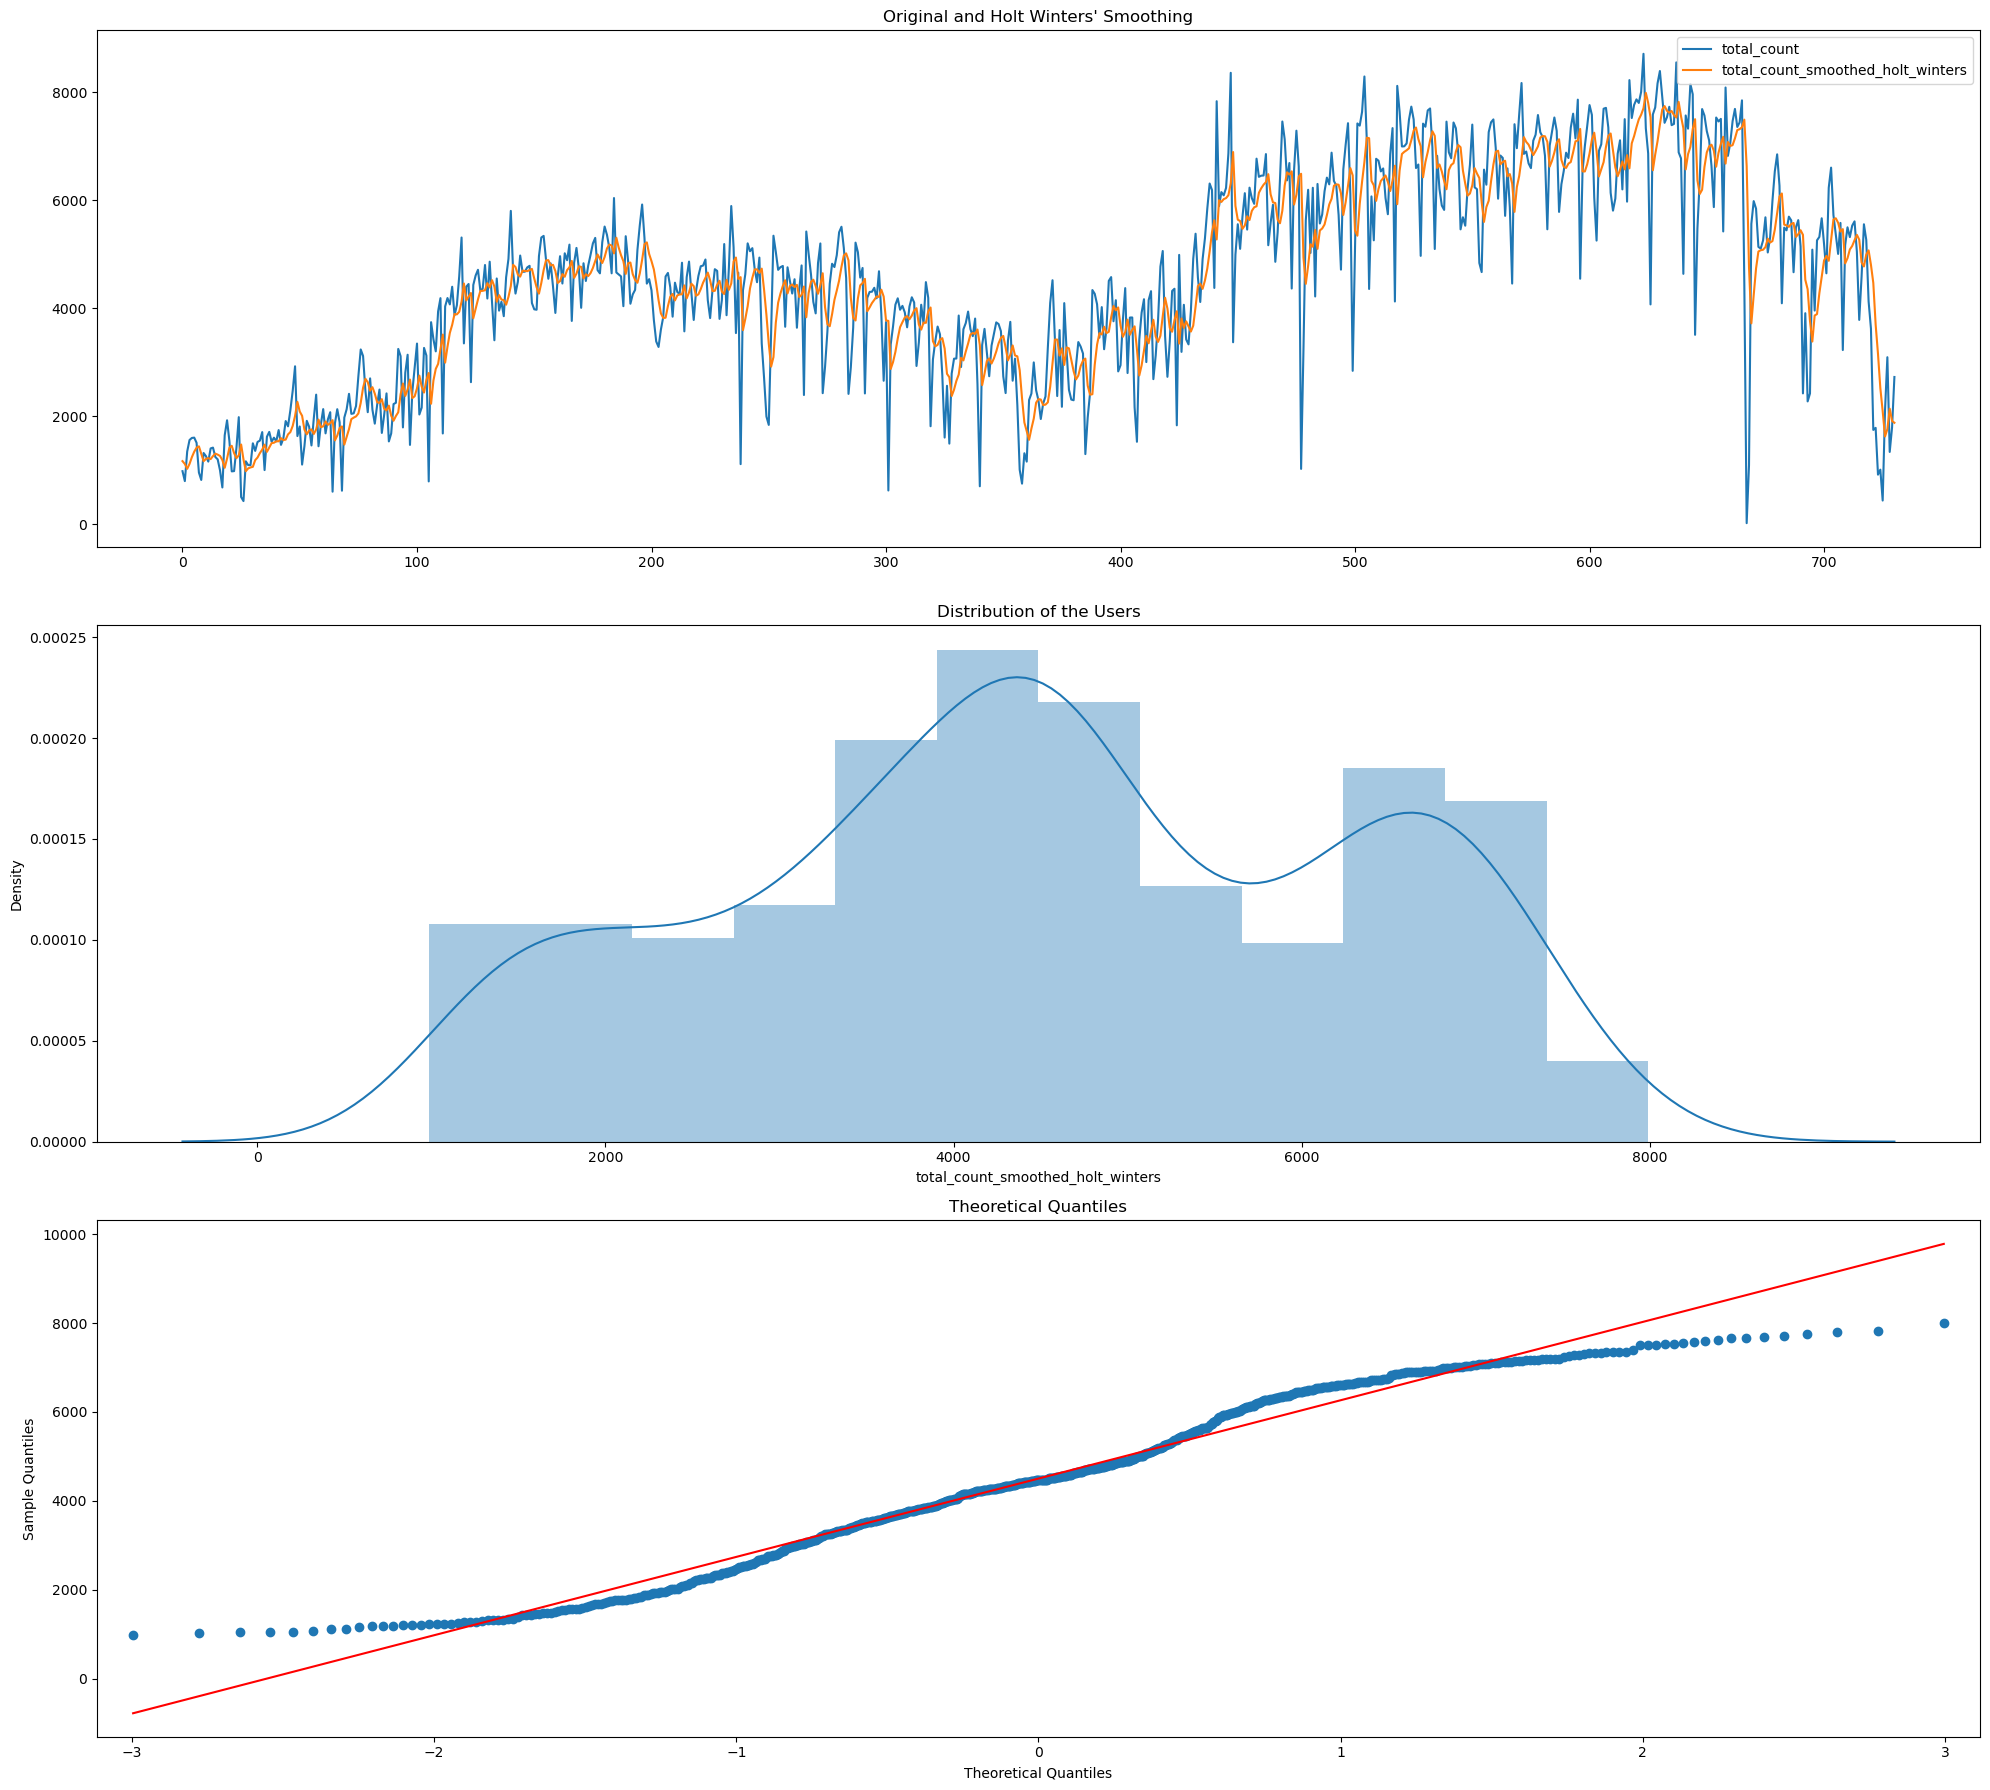

In [993]:
#holt winters smoothing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.gofplots import qqplot

data['total_count_smoothed_holt_winters'] = ExponentialSmoothing(data['total_count']).fit().fittedvalues

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,18))

data[['total_count', 'total_count_smoothed_holt_winters']].plot(ax=ax1)
ax1.set(title='Original and Holt Winters\' Smoothing')

sns.distplot(data['total_count_smoothed_holt_winters'], ax=ax2)
ax2.set(title='Distribution of the Users')

qqplot(data['total_count_smoothed_holt_winters'], ax=ax3, line='s')
ax3.set(title='Theoretical Quantiles')

plt.tight_layout()
plt.show()

In [994]:
ranked_methods = rank_methods(data, ['kalman','holt_winters', 'savgol'])
print('The methods ranked from best to worst are:', ranked_methods)

The methods ranked from best to worst are: ['kalman', 'savgol', 'holt_winters']


##### Frequency


To add the right frequency to my smoothed time series, i need to consider the periodicity and seasonality of my data. Since my data is hourly, i can use the hour column as the frequency. I can also use the season, month, weekday, and weather columns to capture the seasonal patterns in my data.

In [995]:
data.columns

Index(['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'total_count', 'total_count_smoothed_kalman',
       'total_count_smoothed_savgol', 'total_count_smoothed_holt_winters'],
      dtype='object')

To analyze the new time series in terms of stationarity and seasonality : 
- Stationarity means that the statistical properties of the time series (such as mean, variance, and autocorrelation) do not change over time. 
- Seasonality means that the time series exhibits regular and predictable patterns that repeat over a specific period. Some possible methods and tests are:

- Plotting the time series and looking for trends, cycles, and seasonal patterns visually (done in EDA).
- Decomposing the time series into trend, seasonal, and residual components using the seasonal_decompose() function from the statsmodels library (done in EDA).
New proposed methods : 
- Calculating the summary statistics (such as mean and standard deviation) for different time intervals and comparing them.
- Performing the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for the presence of a unit root in the time series. A unit root means that the time series is non-stationary and has some stochastic trend. The null hypothesis of the ADF test is that the time series has a unit root, while the null hypothesis of the KPSS test is that the time series is stationary. I will   use the adfuller() and kpss() functions from the statsmodels library to perform these tests.

In [996]:
data['datetime'] = pd.to_datetime(data['date'].dt.strftime('%Y-%m-%d'))

data.set_index('datetime', inplace=True)

ts = pd.Series(data=data['total_count_smoothed_kalman'].values, index=data.index)

ts = ts.asfreq('D')

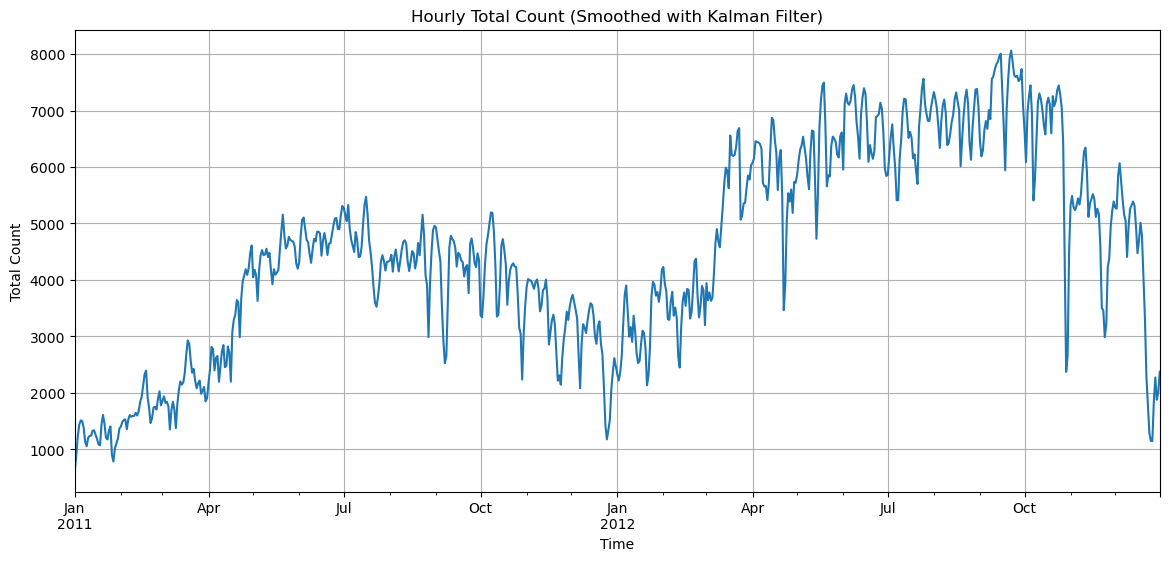

In [997]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
ts.plot()
plt.title('Hourly Total Count (Smoothed with Kalman Filter)')
plt.xlabel('Time')
plt.ylabel('Total Count')
plt.grid(True)
plt.show()


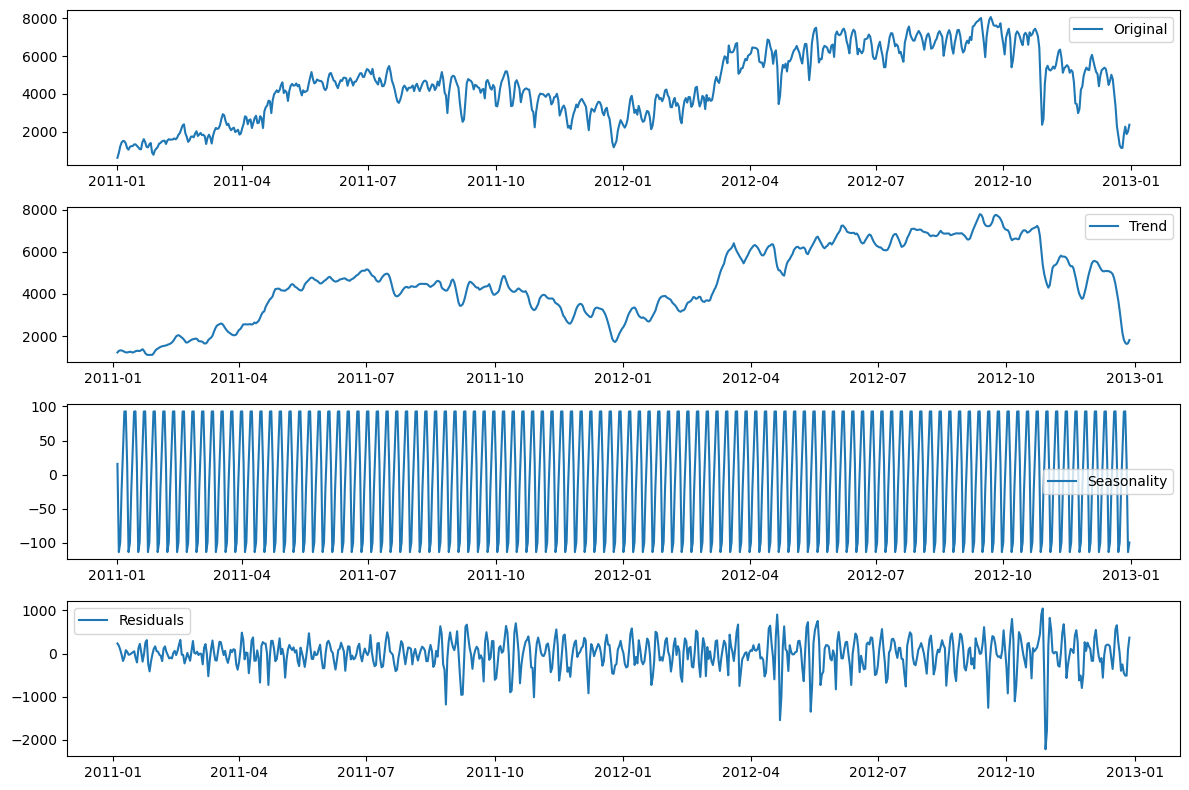

In [998]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(ts, model='additive')

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


decompose it into trend, seasonal, and residual components. However, the period would be different. For daily data, a common choice for the period is 7 (representing a week)

In [999]:
ts.dropna(inplace=True)

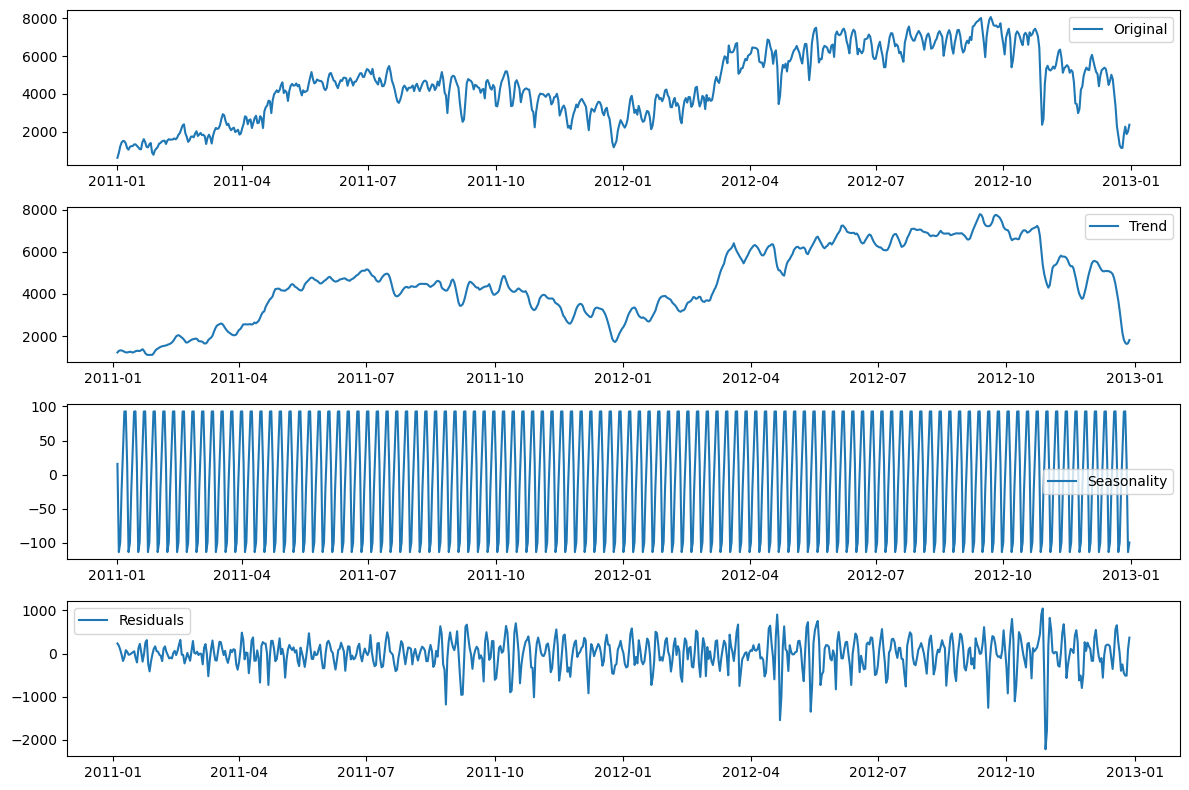

In [1000]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(ts.dropna(), model='additive', period=7)

# Plot the original time series, the trend, the seasonality, and the residuals 
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [1001]:
print('Number of data points per day:', ts.resample('D').count())


Number of data points per day: datetime
2011-01-01    1
2011-01-02    1
2011-01-03    1
2011-01-04    1
2011-01-05    1
             ..
2012-12-27    1
2012-12-28    1
2012-12-29    1
2012-12-30    1
2012-12-31    1
Freq: D, Length: 731, dtype: int64


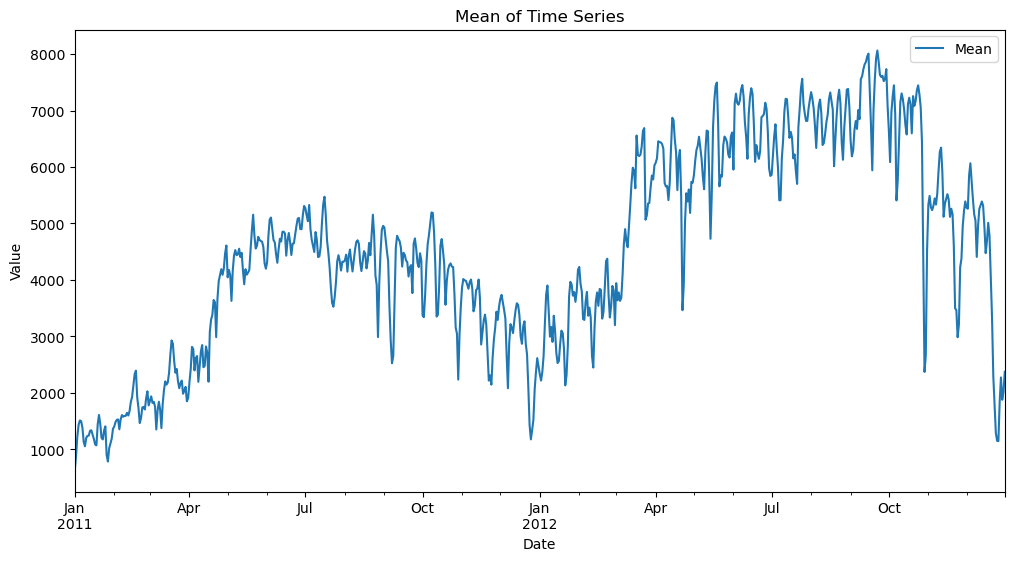

In [1002]:
import matplotlib.pyplot as plt

mean = ts.resample('D').mean()

plt.figure(figsize=(12,6))

mean.plot(label='Mean')

plt.title('Mean of Time Series')
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend(loc='best')

plt.show()
# we have one data point so there is no std per day 

In [1003]:
std_dev

datetime
2011-01-01    30.694495
2011-01-02    26.122603
2011-01-03    37.251476
2011-01-04    44.628865
2011-01-05    44.075953
                ...    
2012-12-27    60.081861
2012-12-28    86.098082
2012-12-29    37.553105
2012-12-30    51.689299
2012-12-31    77.709201
Freq: D, Length: 731, dtype: float64

In [1004]:
is_stationary(ts)


The series is likely non-stationary according to the ADF test.

Performing KPSS test...
The series is likely non-stationary according to the KPSS test.


C:\Users\Rania\AppData\Local\Temp\ipykernel_11256\953118256.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(ts.dropna())


In [1005]:
data.columns

Index(['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'total_count', 'total_count_smoothed_kalman',
       'total_count_smoothed_savgol', 'total_count_smoothed_holt_winters'],
      dtype='object')

In [1006]:
col_index = data.columns.get_loc('total_count_smoothed_kalman')
data = data.iloc[:, :col_index+1]
data.columns

Index(['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'total_count', 'total_count_smoothed_kalman'],
      dtype='object')

In [1007]:
data.to_csv('day-pre.csv')